In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
import IPython.display as disp


In [2]:
# === Set the shared path ===
base_path = r'G:\csv_outputs'

# === Load all datasets into memory ===
df_rest = pd.read_csv(f"{base_path}\\Rest_dataset.csv")
df_scap = pd.read_csv(f"{base_path}\\SCAP_dataset.csv")
df_sst_go = pd.read_csv(f"{base_path}\\SST_Go_dataset.csv")
df_sst_stop = pd.read_csv(f"{base_path}\\SST_Stop_dataset.csv")
df_combined = pd.read_csv(f"{base_path}\\Combined_4Condition_Cleaned.csv")

# === Optional: print shapes for quick verification ===
print(f"Rest shape: {df_rest.shape}")
print(f"SCAP shape: {df_scap.shape}")
print(f"SST Go shape: {df_sst_go.shape}")
print(f"SST Stop shape: {df_sst_stop.shape}")
print(f"Combined shape: {df_combined.shape}")
for name, df in {
    "df_rest": df_rest,
    "df_scap": df_scap,
    "df_sst_go": df_sst_go,
    "df_sst_stop": df_sst_stop,
    "df_combined": df_combined
}.items():
    print(f"\n📂 Preview of {name}")
    display(df.head())

Rest shape: (162, 17)
SCAP shape: (162, 17)
SST Go shape: (160, 17)
SST Stop shape: (160, 17)
Combined shape: (159, 62)

📂 Preview of df_rest


Subject_ID  cingulum_ant_mid_pos_to_Middle_frontal_R_L  \
0           1                                    0.014834   
1           2                                    0.224328   
2           3                                   -0.096183   
3           4                                    0.197552   
4           5                                    0.041581   

   cingulum_ant_mid_pos_to_occipital_sup_R_L  \
0                                  -0.336479   
1                                  -0.207740   
2                                  -0.234593   
3                                  -0.102718   
4                                  -0.205092   

   cingulum_ant_mid_pos_to_Precentral_MFG_R_L  \
0                                   -0.027677   
1                                    0.105979   
2                                   -0.196171   
3                                    0.098043   
4                                   -0.171112   

   cingulum_ant_mid_pos_to_precuneus_R_L  cingulum_ant_mid_pos_to_SMA_R_L  \
0                               0.095930                         0.310541   
1                               0.182406                         0.402633   
2                               0.192215                         0.224086   
3                               0.307917                         0.196048   
4                               0.617818                        -0.032995   

   Middle_frontal_R_L_to_occipital_sup_R_L  \
0                                 0.124793   
1                                -0.193574   
2                                -0.007425   
3                                -0.212539   
4                                 0.241889   

   Middle_frontal_R_L_to_Precentral_MFG_R_L  \
0                                  1.091338   
1                                  0.856011   
2                                  0.861975   
3                                  0.891392   
4                                  1.020725   

   Middle_frontal_R_L_to_precuneus_R_L  Middle_frontal_R_L_to_SMA_R_L  \
0                            -0.033260                      -0.095316   
1                             0.166000                       0.032188   
2                            -0.141263                       0.214659   
3                            -0.098651                       0.204031   
4                             0.386042                      -0.160685   

   occipital_sup_R_L_to_Precentral_MFG_R_L  \
0                                 0.091860   
1                                 0.002817   
2                                 0.365036   
3                                -0.325966   
4                                 0.162223   

   occipital_sup_R_L_to_precuneus_R_L  occipital_sup_R_L_to_SMA_R_L  \
0                           -0.172184                     -0.418083   
1                            0.216964                     -0.271676   
2                            0.454033                      0.192775   
3                            0.375687                     -0.303837   
4                            0.077697                     -0.131482   

   Precentral_MFG_R_L_to_precuneus_R_L  Precentral_MFG_R_L_to_SMA_R_L  \
0                            -0.441545                       0.067903   
1                             0.218847                       0.361790   
2                             0.172229                       0.610110   
3                            -0.251695                       0.763878   
4                            -0.018523                       0.193441   

   precuneus_R_L_to_SMA_R_L  Label  
0                 -0.171006      0  
1                 -0.035532      0  
2                  0.128216      0  
3                 -0.210782      0  
4                 -0.459870      0


📂 Preview of df_scap


Subject_ID  cingulum_ant_mid_pos_to_Middle_frontal_R_L  \
0           1                                    0.142647   
1           2                                    0.243999   
2           3                                    0.207624   
3           4                                   -0.008218   
4           5                                    0.035059   

   cingulum_ant_mid_pos_to_occipital_sup_R_L  \
0                                  -0.215284   
1                                  -0.117161   
2                                   0.043595   
3                                  -0.224293   
4                                  -0.233014   

   cingulum_ant_mid_pos_to_Precentral_MFG_R_L  \
0                                    0.087326   
1                                    0.131541   
2                                    0.161177   
3                                   -0.111495   
4                                   -0.249397   

   cingulum_ant_mid_pos_to_precuneus_R_L  cingulum_ant_mid_pos_to_SMA_R_L  \
0                               0.291293                         0.242261   
1                               0.281738                        -0.048760   
2                               0.525142                         0.540066   
3                               0.251714                         0.113099   
4                               0.415033                         0.190333   

   Middle_frontal_R_L_to_occipital_sup_R_L  \
0                                 0.233141   
1                                -0.039015   
2                                 0.268013   
3                                -0.128614   
4                                -0.018151   

   Middle_frontal_R_L_to_Precentral_MFG_R_L  \
0                                  1.460526   
1                                  0.929724   
2                                  1.094731   
3                                  1.106769   
4                                  1.311948   

   Middle_frontal_R_L_to_precuneus_R_L  Middle_frontal_R_L_to_SMA_R_L  \
0                            -0.003005                       0.125539   
1                             0.046460                       0.006254   
2                             0.067697                       0.250847   
3                            -0.113552                       0.245479   
4                             0.082699                       0.021432   

   occipital_sup_R_L_to_Precentral_MFG_R_L  \
0                                 0.295018   
1                                -0.068273   
2                                 0.637111   
3                                -0.068015   
4                                -0.032321   

   occipital_sup_R_L_to_precuneus_R_L  occipital_sup_R_L_to_SMA_R_L  \
0                            0.381045                     -0.249845   
1                            0.576768                     -0.334427   
2                            0.230915                      0.378832   
3                            0.426325                     -0.283716   
4                            0.407992                     -0.083465   

   Precentral_MFG_R_L_to_precuneus_R_L  Precentral_MFG_R_L_to_SMA_R_L  \
0                            -0.026405                       0.275565   
1                            -0.060207                       0.393054   
2                             0.153068                       0.587975   
3                            -0.162132                       0.591460   
4                            -0.119818                       0.200683   

   precuneus_R_L_to_SMA_R_L  Label  
0                 -0.145770      0  
1                 -0.272732      0  
2                  0.312992      0  
3                 -0.130679      0  
4                 -0.178696      0


📂 Preview of df_sst_go


Subject_ID  cingulum_ant_mid_pos_to_Middle_frontal_R_L  \
0           1                                    0.447266   
1           2                                    0.310758   
2           3                                    0.124681   
3           4                                    0.078268   
4           5                                   -0.219302   

   cingulum_ant_mid_pos_to_occipital_sup_R_L  \
0                                   0.042322   
1                                  -0.109028   
2                                   0.335086   
3                                  -0.200040   
4                                   0.059131   

   cingulum_ant_mid_pos_to_Precentral_MFG_R_L  \
0                                    0.404630   
1                                    0.173852   
2                                    0.240254   
3                                    0.011671   
4                                   -0.221593   

   cingulum_ant_mid_pos_to_precuneus_R_L  cingulum_ant_mid_pos_to_SMA_R_L  \
0                               0.000750                         0.273312   
1                               0.757355                         0.044834   
2                               1.126439                         0.466919   
3                               0.162859                         0.278975   
4                               0.577210                         0.133754   

   Middle_frontal_R_L_to_occipital_sup_R_L  \
0                                 0.142107   
1                                -0.581868   
2                                 0.164648   
3                                -0.263120   
4                                -0.671008   

   Middle_frontal_R_L_to_Precentral_MFG_R_L  \
0                                  1.359038   
1                                  0.573225   
2                                  1.539010   
3                                  1.248662   
4                                  1.523364   

   Middle_frontal_R_L_to_precuneus_R_L  Middle_frontal_R_L_to_SMA_R_L  \
0                            -0.126479                       0.128439   
1                             0.150502                      -0.350602   
2                             0.074394                       0.702216   
3                            -0.205921                       0.260757   
4                            -0.368914                       0.149985   

   occipital_sup_R_L_to_Precentral_MFG_R_L  \
0                                 0.042118   
1                                -0.146797   
2                                 0.266569   
3                                -0.163860   
4                                -0.685646   

   occipital_sup_R_L_to_precuneus_R_L  occipital_sup_R_L_to_SMA_R_L  \
0                            0.391756                     -0.260017   
1                            0.198446                      0.024454   
2                            0.487911                      0.166358   
3                            0.518661                     -0.161345   
4                            0.443582                     -0.394605   

   Precentral_MFG_R_L_to_precuneus_R_L  Precentral_MFG_R_L_to_SMA_R_L  \
0                            -0.225543                       0.354034   
1                             0.082652                       0.213424   
2                             0.260984                       0.916094   
3                            -0.119922                       0.587265   
4                            -0.392430                       0.223622   

   precuneus_R_L_to_SMA_R_L  Label  
0                 -0.131092      0  
1                 -0.011084      0  
2                  0.419061      0  
3                 -0.150849      0  
4                 -0.158804      0


📂 Preview of df_sst_stop


Subject_ID  cingulum_ant_mid_pos_to_Middle_frontal_R_L  \
0           1                                    0.361646   
1           2                                    0.489276   
2           3                                   -0.267607   
3           4                                    0.512846   
4           5                                   -0.354669   

   cingulum_ant_mid_pos_to_occipital_sup_R_L  \
0                                  -0.164698   
1                                  -0.342478   
2                                   0.026862   
3                                  -0.312336   
4                                  -0.176264   

   cingulum_ant_mid_pos_to_Precentral_MFG_R_L  \
0                                    0.383094   
1                                    0.324554   
2                                   -0.191715   
3                                    0.372977   
4                                   -0.273415   

   cingulum_ant_mid_pos_to_precuneus_R_L  cingulum_ant_mid_pos_to_SMA_R_L  \
0                               0.076560                         0.578571   
1                               0.634806                        -0.058317   
2                               1.161695                         0.398062   
3                               0.258791                         0.401427   
4                               0.388704                         0.163021   

   Middle_frontal_R_L_to_occipital_sup_R_L  \
0                                 0.408713   
1                                -0.893213   
2                                 0.268047   
3                                -0.193663   
4                                -0.175911   

   Middle_frontal_R_L_to_Precentral_MFG_R_L  \
0                                  1.170319   
1                                  0.691951   
2                                  1.750895   
3                                  1.038488   
4                                  1.256165   

   Middle_frontal_R_L_to_precuneus_R_L  Middle_frontal_R_L_to_SMA_R_L  \
0                             0.049062                      -0.059655   
1                             0.023209                      -0.150087   
2                            -0.313144                       0.298938   
3                             0.097237                       0.045666   
4                            -0.291213                      -0.104330   

   occipital_sup_R_L_to_Precentral_MFG_R_L  \
0                                 0.214845   
1                                -0.154228   
2                                 0.407614   
3                                -0.069983   
4                                -0.368432   

   occipital_sup_R_L_to_precuneus_R_L  occipital_sup_R_L_to_SMA_R_L  \
0                            0.125462                     -0.699487   
1                            0.228777                      0.127418   
2                           -0.014526                      0.317849   
3                            0.414711                     -0.083123   
4                            0.362466                     -0.289908   

   Precentral_MFG_R_L_to_precuneus_R_L  Precentral_MFG_R_L_to_SMA_R_L  \
0                            -0.089129                       0.276727   
1                             0.228602                       0.198429   
2                            -0.231258                       0.476005   
3                             0.237377                       0.517069   
4                            -0.247124                       0.047685   

   precuneus_R_L_to_SMA_R_L  Label  
0                 -0.268441      0  
1                  0.043162      0  
2                  0.103781      0  
3                  0.119239      0  
4                 -0.010366      0


📂 Preview of df_combined


Subject_ID  Rest_cingulum_ant_mid_pos_to_Middle_frontal_R_L  \
0           1                                         0.014834   
1           2                                         0.224328   
2           3                                        -0.096183   
3           4                                         0.197552   
4           5                                         0.041581   

   Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L  \
0                                       -0.336479   
1                                       -0.207740   
2                                       -0.234593   
3                                       -0.102718   
4                                       -0.205092   

   Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L  \
0                                        -0.027677   
1                                         0.105979   
2                                        -0.196171   
3                                         0.098043   
4                                        -0.171112   

   Rest_cingulum_ant_mid_pos_to_precuneus_R_L  \
0                                    0.095930   
1                                    0.182406   
2                                    0.192215   
3                                    0.307917   
4                                    0.617818   

   Rest_cingulum_ant_mid_pos_to_SMA_R_L  \
0                              0.310541   
1                              0.402633   
2                              0.224086   
3                              0.196048   
4                             -0.032995   

   Rest_Middle_frontal_R_L_to_occipital_sup_R_L  \
0                                      0.124793   
1                                     -0.193574   
2                                     -0.007425   
3                                     -0.212539   
4                                      0.241889   

   Rest_Middle_frontal_R_L_to_Precentral_MFG_R_L  \
0                                       1.091338   
1                                       0.856011   
2                                       0.861975   
3                                       0.891392   
4                                       1.020725   

   Rest_Middle_frontal_R_L_to_precuneus_R_L  \
0                                 -0.033260   
1                                  0.166000   
2                                 -0.141263   
3                                 -0.098651   
4                                  0.386042   

   Rest_Middle_frontal_R_L_to_SMA_R_L  ...  \
0                           -0.095316  ...   
1                            0.032188  ...   
2                            0.214659  ...   
3                            0.204031  ...   
4                           -0.160685  ...   

   SST_Stop_Middle_frontal_R_L_to_Precentral_MFG_R_L  \
0                                           1.170319   
1                                           0.691951   
2                                           1.750895   
3                                           1.038488   
4                                           1.256165   

   SST_Stop_Middle_frontal_R_L_to_precuneus_R_L  \
0                                      0.049062   
1                                      0.023209   
2                                     -0.313144   
3                                      0.097237   
4                                     -0.291213   

   SST_Stop_Middle_frontal_R_L_to_SMA_R_L  \
0                               -0.059655   
1                               -0.150087   
2                                0.298938   
3                                0.045666   
4                               -0.104330   

   SST_Stop_occipital_sup_R_L_to_Precentral_MFG_R_L  \
0                                          0.214845   
1                                         -0.154228   
2                                          0.407614   
3                                         -0.069983   
4                                     


📊 Inspecting: Combined_4Condition_Cleaned
Shape: (159, 62)

🔍 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 62 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Subject_ID                                           159 non-null    int64  
 1   Rest_cingulum_ant_mid_pos_to_Middle_frontal_R_L      159 non-null    float64
 2   Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L       159 non-null    float64
 3   Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L      159 non-null    float64
 4   Rest_cingulum_ant_mid_pos_to_precuneus_R_L           159 non-null    float64
 5   Rest_cingulum_ant_mid_pos_to_SMA_R_L                 159 non-null    float64
 6   Rest_Middle_frontal_R_L_to_occipital_sup_R_L         159 non-null    float64
 7   Rest_Middle_frontal_R_L_to_Precentral_MFG_R_L        159 non-null    floa

count    mean     std    min  \
Subject_ID                                       159.0  80.245  46.366  1.000   
Rest_cingulum_ant_mid_pos_to_Middle_frontal_R_L  159.0   0.178   0.242 -0.340   
Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L   159.0  -0.096   0.232 -0.741   
Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L  159.0   0.116   0.262 -0.483   
Rest_cingulum_ant_mid_pos_to_precuneus_R_L       159.0   0.430   0.243 -0.274   
...                                                ...     ...     ...    ...   
SST_Stop_occipital_sup_R_L_to_SMA_R_L            159.0   0.026   0.284 -0.737   
SST_Stop_Precentral_MFG_R_L_to_precuneus_R_L     159.0   0.016   0.266 -0.652   
SST_Stop_Precentral_MFG_R_L_to_SMA_R_L           159.0   0.408   0.311 -0.599   
SST_Stop_precuneus_R_L_to_SMA_R_L                159.0  -0.111   0.293 -0.816   
Label                                            159.0   0.245   0.432  0.000   

                                                    25%     50%      75%  \
Subject_ID                                       40.500  80.000  119.500   
Rest_cingulum_ant_mid_pos_to_Middle_frontal_R_L   0.013   0.162    0.317   
Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L   -0.241  -0.116    0.039   
Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L  -0.081   0.106    0.284   
Rest_cingulum_ant_mid_pos_to_precuneus_R_L        0.242   0.427    0.585   
...                                                 ...     ...      ...   
SST_Stop_occipital_sup_R_L_to_SMA_R_L            -0.181   0.048    0.218   
SST_Stop_Precentral_MFG_R_L_to_precuneus_R_L     -0.177   0.030    0.211   
SST_Stop_Precentral_MFG_R_L_to_SMA_R_L            0.202   0.405    0.591   
SST_Stop_precuneus_R_L_to_SMA_R_L                -0.340  -0.137    0.110   
Label                                             0.000   0.000    0.000   

                                                     max  
Subject_ID                                       160.000  
Rest_cingulum_ant_mid_pos_to_Middle_frontal_R_L    1.190  
Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L     0.479  
Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L    1.145  
Rest_cingulum_ant_mid_pos_to_precuneus_R_L         1.021  
...                                                  ...  
SST_Stop_occipital_sup_R_L_to_SMA_R_L              0.800  
SST_Stop_Precentral_MFG_R_L_to_precuneus_R_L       0.706  
SST_Stop_Precentral_MFG_R_L_to_SMA_R_L             1.592  
SST_Stop_precuneus_R_L_to_SMA_R_L                  0.588  
Label                                              1.000  

[62 rows x 8 columns]


Class Distribution:
 Label
0    120
1     39
Name: count, dtype: int64
✅ No missing values.


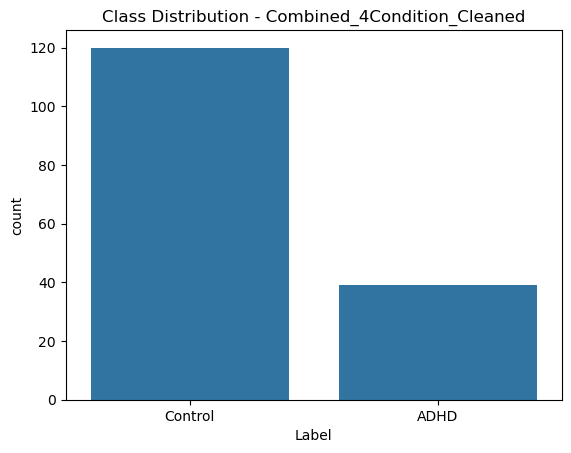

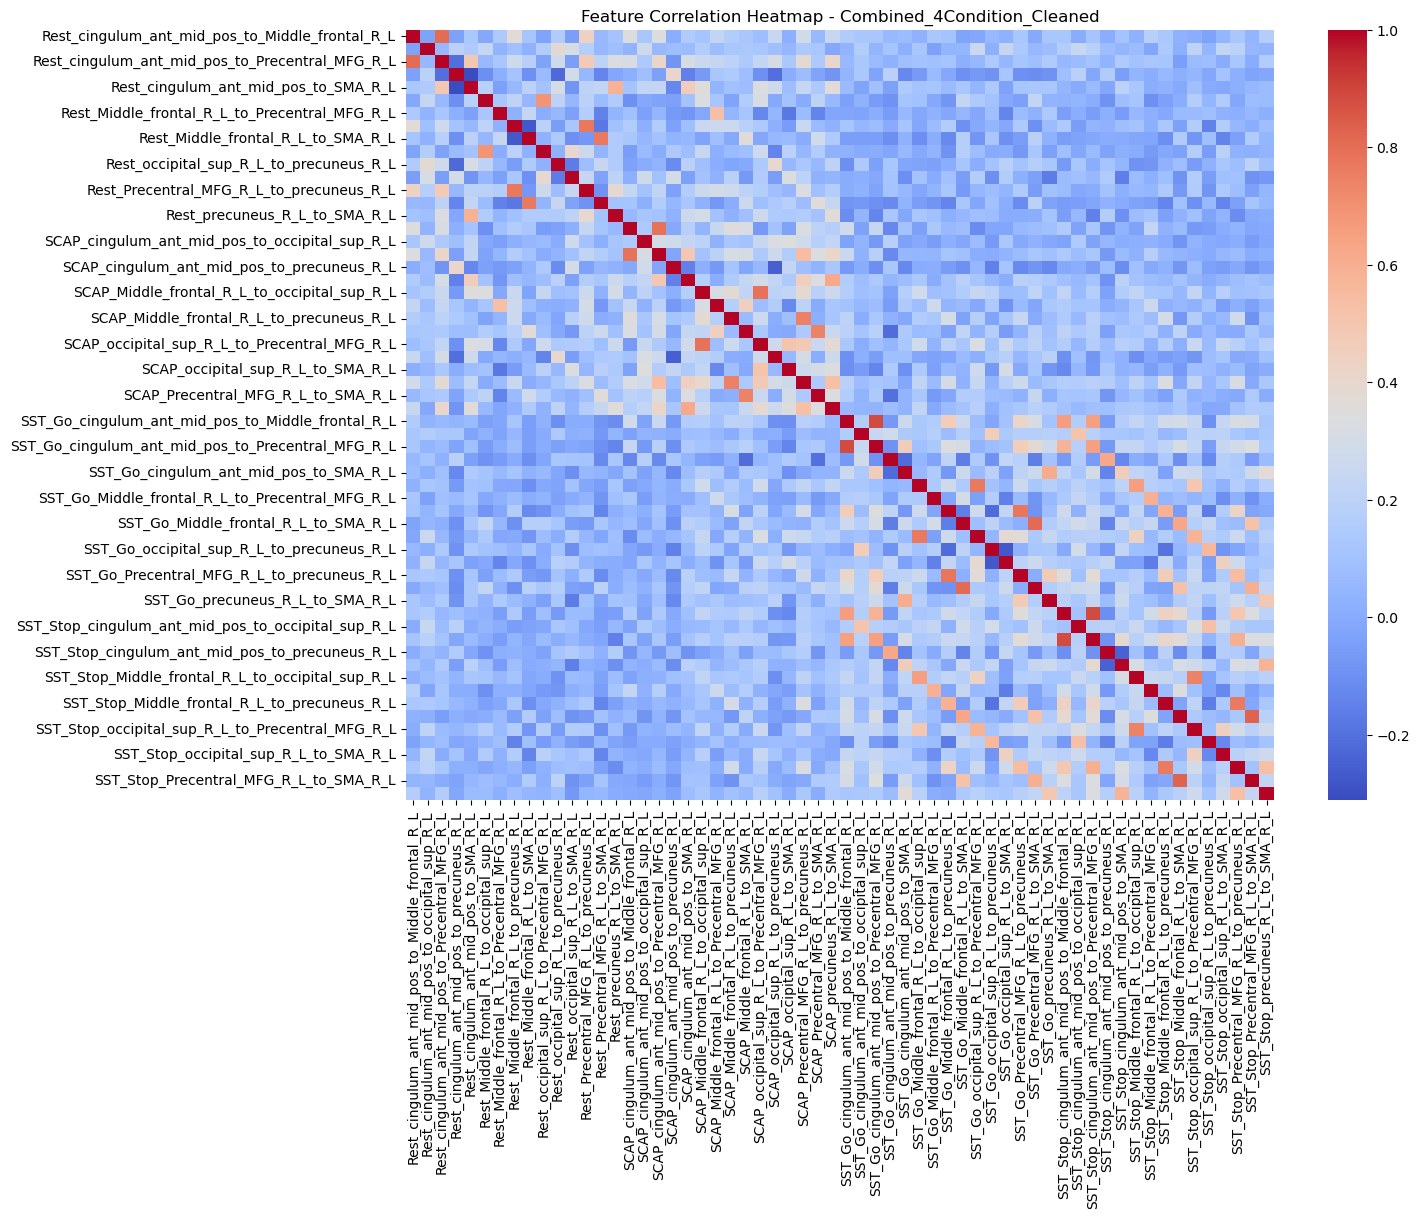


🔁 Duplicate Rows: 0

📌 Outlier Count per Feature:
Rest_cingulum_ant_mid_pos_to_Middle_frontal_R_L: 2
Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L: 5
Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L: 1
Rest_cingulum_ant_mid_pos_to_precuneus_R_L: 1
Rest_cingulum_ant_mid_pos_to_SMA_R_L: 0
Rest_Middle_frontal_R_L_to_occipital_sup_R_L: 2
Rest_Middle_frontal_R_L_to_Precentral_MFG_R_L: 0
Rest_Middle_frontal_R_L_to_precuneus_R_L: 4
Rest_Middle_frontal_R_L_to_SMA_R_L: 1
Rest_occipital_sup_R_L_to_Precentral_MFG_R_L: 6
Rest_occipital_sup_R_L_to_precuneus_R_L: 2
Rest_occipital_sup_R_L_to_SMA_R_L: 3
Rest_Precentral_MFG_R_L_to_precuneus_R_L: 2
Rest_Precentral_MFG_R_L_to_SMA_R_L: 1
Rest_precuneus_R_L_to_SMA_R_L: 0
SCAP_cingulum_ant_mid_pos_to_Middle_frontal_R_L: 2
SCAP_cingulum_ant_mid_pos_to_occipital_sup_R_L: 2
SCAP_cingulum_ant_mid_pos_to_Precentral_MFG_R_L: 1
SCAP_cingulum_ant_mid_pos_to_precuneus_R_L: 2
SCAP_cingulum_ant_mid_pos_to_SMA_R_L: 3
SCAP_Middle_frontal_R_L_to_occipital_sup_R_L: 1
SCA

In [15]:
# === WORKING WITH ONLY THE COMBINED DATAFRAME ===

print(f"\n{'='*40}\n📊 Inspecting: Combined_4Condition_Cleaned\n{'='*40}")
print(f"Shape: {df_combined.shape}")

# === BASIC INFO ===
print("\n🔍 DataFrame Info:")
df_combined.info()

# === SHAPE ===
print(f"\n🧮 Shape: {df_combined.shape}")

# === DESCRIPTIVE STATISTICS ===
print("\n📈 Descriptive Statistics (Transposed):")
desc_stats = df_combined.describe().transpose().round(3)
disp.display(desc_stats)

# === CLASS DISTRIBUTION ===
print("\nClass Distribution:\n", df_combined['Label'].value_counts())

# === MISSING VALUES CHECK ===
if df_combined.isnull().sum().sum() > 0:
    print("⚠️ Missing values detected!")
else:
    print("✅ No missing values.")

# === CLASS DISTRIBUTION PLOT ===
sns.countplot(x='Label', data=df_combined)
plt.title('Class Distribution - Combined_4Condition_Cleaned')
plt.xticks([0, 1], ['Control', 'ADHD'])
plt.show()

# === CORRELATION HEATMAP ===
feature_cols = [col for col in df_combined.columns if col not in ['Subject_ID', 'Label']]
plt.figure(figsize=(14, 10))
sns.heatmap(df_combined[feature_cols].corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap - Combined_4Condition_Cleaned')
plt.show()

# === DUPLICATE ROWS CHECK ===
duplicate_count = df_combined.duplicated().sum()
print(f"\n🔁 Duplicate Rows: {duplicate_count}")

# === OUTLIER DETECTION (IQR METHOD) ===
outlier_counts = {}
for col in feature_cols:
    Q1 = df_combined[col].quantile(0.25)
    Q3 = df_combined[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_combined[col] < (Q1 - 1.5 * IQR)) | (df_combined[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts[col] = outliers

print("\n📌 Outlier Count per Feature:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")
# === SHOW DUPLICATED ROWS IN df_combined ===
duplicated_rows = df_combined[df_combined.duplicated()]
print(f"\n🔁 Number of Duplicated Rows: {len(duplicated_rows)}")




In [8]:
df_corr = df[feature_cols + ['Label']].corr()
label_corr = df_corr['Label'].drop('Label').sort_values(key=abs, ascending=False)
print("\n📈 Top 10 Features Most Correlated with Label:")
print(label_corr.head(20))



📈 Top 10 Features Most Correlated with Label:
SST_Stop_cingulum_ant_mid_pos_to_SMA_R_L              -0.230027
Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L         0.201219
SCAP_cingulum_ant_mid_pos_to_precuneus_R_L             0.194151
SST_Stop_Precentral_MFG_R_L_to_precuneus_R_L          -0.189902
SST_Stop_cingulum_ant_mid_pos_to_precuneus_R_L         0.183596
SST_Stop_precuneus_R_L_to_SMA_R_L                     -0.181281
SST_Go_Middle_frontal_R_L_to_SMA_R_L                  -0.171355
SST_Go_cingulum_ant_mid_pos_to_Middle_frontal_R_L     -0.166671
SST_Stop_Middle_frontal_R_L_to_SMA_R_L                -0.153581
SST_Stop_Middle_frontal_R_L_to_precuneus_R_L          -0.144050
SST_Go_Precentral_MFG_R_L_to_SMA_R_L                  -0.141580
SST_Go_cingulum_ant_mid_pos_to_precuneus_R_L           0.140735
SCAP_cingulum_ant_mid_pos_to_occipital_sup_R_L         0.137939
SCAP_Precentral_MFG_R_L_to_SMA_R_L                    -0.133808
SST_Stop_cingulum_ant_mid_pos_to_Precentral_MFG_R_L   -0.

In [12]:
# === FEATURES ===
feature_cols = [col for col in df_combined.columns if col not in ['Subject_ID', 'Label']]
control_df = df_combined[df_combined['Label'] == 0]
adhd_df = df_combined[df_combined['Label'] == 1]

# === BUILD PLOT ===
fig = make_subplots(rows=1, cols=2, subplot_titles=["", ""])

for i, feature in enumerate(feature_cols):
    x_control = control_df[feature]
    x_adhd = adhd_df[feature]

    # Shared bins and KDE x-axis for consistent range
    x_range = np.linspace(min(x_control.min(), x_adhd.min()), max(x_control.max(), x_adhd.max()), 200)

    # Control KDE (scaled)
    kde_ctrl = gaussian_kde(x_control)
    kde_ctrl_y = kde_ctrl(x_range) * len(x_control) * (x_control.max() - x_control.min()) / 30  # match histogram scale

    # ADHD KDE (scaled)
    kde_adhd = gaussian_kde(x_adhd)
    kde_adhd_y = kde_adhd(x_range) * len(x_adhd) * (x_adhd.max() - x_adhd.min()) / 30

    # Histogram bin width based on data range
    bin_width = (x_range.max() - x_range.min()) / 30

    fig.add_trace(go.Histogram(
        x=x_control,
        name='Control',
        xaxis='x1',
        yaxis='y1',
        marker_color='blue',
        nbinsx=30,
        opacity=0.6,
        visible=(i == 0),
        showlegend=False
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=x_range,
        y=kde_ctrl_y,
        mode='lines',
        line=dict(color='blue', dash='dot'),
        name='Control KDE',
        visible=(i == 0),
        showlegend=False
    ), row=1, col=1)

    fig.add_trace(go.Histogram(
        x=x_adhd,
        name='ADHD',
        xaxis='x2',
        yaxis='y2',
        marker_color='red',
        nbinsx=30,
        opacity=0.6,
        visible=(i == 0),
        showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Scatter(
        x=x_range,
        y=kde_adhd_y,
        mode='lines',
        line=dict(color='red', dash='dot'),
        name='ADHD KDE',
        visible=(i == 0),
        showlegend=False
    ), row=1, col=2)

# === DROPDOWN MENU ===
buttons = []
for i, feature in enumerate(feature_cols):
    vis = [False] * (4 * len(feature_cols))
    vis[i*4 + 0] = True  # hist control
    vis[i*4 + 1] = True  # kde control
    vis[i*4 + 2] = True  # hist adhd
    vis[i*4 + 3] = True  # kde adhd

    # Compute stats
    mc, sc = control_df[feature].mean(), control_df[feature].std()
    ma, sa = adhd_df[feature].mean(), adhd_df[feature].std()
    title_texts = [
        f"Control — {feature}<br>Mean = {mc:.2f}, Std = {sc:.2f}",
        f"ADHD — {feature}<br>Mean = {ma:.2f}, Std = {sa:.2f}"
    ]

    buttons.append(dict(
    label=feature,
    method='update',
    args=[
        {'visible': vis},
        {'title': f'Feature: {feature}',
         'annotations': [
             dict(
                 text=f"<b>Control</b><br>Mean = {mc:.2f}<br>Std = {sc:.2f}",
                 x=0.15, y=1.08, xref='paper', yref='paper',
                 showarrow=False, font=dict(size=12), align='left'
             ),
             dict(
                 text=f"<b>ADHD</b><br>Mean = {ma:.2f}<br>Std = {sa:.2f}",
                 x=0.85, y=1.08, xref='paper', yref='paper',
                 showarrow=False, font=dict(size=12), align='right'
             )
         ]}
    ]
))


# === LAYOUT ===
fig.update_layout(
    height=600, width=1000,
    title='Interactive Feature Histogram & KDE: Control vs ADHD',
    updatemenus=[dict(
        buttons=buttons,
        direction='down',
        x=1.05, xanchor='left',
        y=1.15, yanchor='top',
        showactive=True
    )],
    bargap=0.1
)

fig.show()


In [14]:
# === Load preloaded DataFrame ===
# === Setup ===
feature_cols = [col for col in df_combined.columns if col not in ['Subject_ID', 'Label']]
control_df = df_combined[df_combined['Label'] == 0]
adhd_df = df_combined[df_combined['Label'] == 1]

# === Initialize Figure ===
fig = make_subplots(rows=1, cols=2, subplot_titles=["", ""])

trace_count = 0
valid_features = []

# === Add Box Plots ===
for feature in feature_cols:
    x_control = control_df[feature].dropna()
    x_adhd = adhd_df[feature].dropna()

    if len(x_control) < 2 or len(x_adhd) < 2:
        continue

    valid_features.append(feature)

    fig.add_trace(go.Box(
        y=x_control, name='Control', marker_color='blue',
        boxmean=True, visible=(trace_count == 0),
        showlegend=False
    ), row=1, col=1)

    fig.add_trace(go.Box(
        y=x_adhd, name='ADHD', marker_color='red',
        boxmean=True, visible=(trace_count == 0),
        showlegend=False
    ), row=1, col=2)

    trace_count += 1

# === Dropdown Buttons ===
buttons = []
for i, feature in enumerate(valid_features):
    vis = [False] * (2 * len(valid_features))
    vis[i*2 + 0] = True
    vis[i*2 + 1] = True

    mc, sc = control_df[feature].mean(), control_df[feature].std()
    ma, sa = adhd_df[feature].mean(), adhd_df[feature].std()

    buttons.append(dict(
        label=feature,
        method='update',
        args=[
            {'visible': vis},
            {'title': f'Feature: {feature}',
             'annotations': [
                 dict(
                     text=f"<b>Control</b><br>Mean = {mc:.2f}<br>Std = {sc:.2f}",
                     x=0.15, y=1.08, xref='paper', yref='paper',
                     showarrow=False, font=dict(size=12), align='left'
                 ),
                 dict(
                     text=f"<b>ADHD</b><br>Mean = {ma:.2f}<br>Std = {sa:.2f}",
                     x=0.85, y=1.08, xref='paper', yref='paper',
                     showarrow=False, font=dict(size=12), align='right'
                 )
             ]}
        ]
    ))

# === Layout ===
fig.update_layout(
    height=600, width=1000,
    title='Interactive Box Plots: Control vs ADHD',
    updatemenus=[dict(
        buttons=buttons,
        direction='down',
        x=1.05, xanchor='left',
        y=1.15, yanchor='top',
        showactive=True
    )]
)

fig.show()
df_combined['Label'] = df_combined['Label'].replace({'Control': 0, 'ADHD': 1})


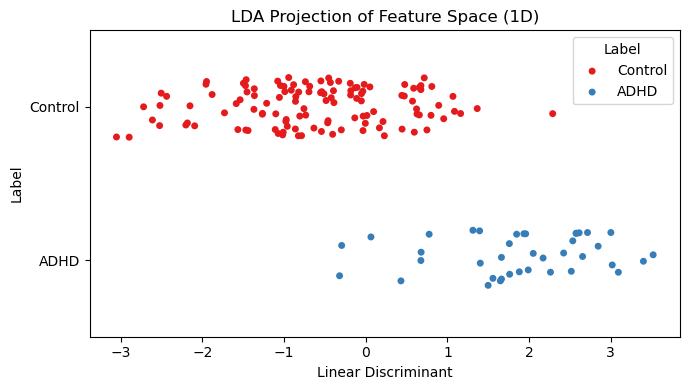

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# === PREPARE DATA ===
X = df_combined[feature_cols]
y = df_combined['Label']

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply LDA (n_components=1 for binary classification)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Plot LDA projection (1D → jittered vertically for visualization)
plt.figure(figsize=(7, 4))
sns.stripplot(x=X_lda[:, 0], y=y, orient='h', hue=y, palette='Set1', jitter=0.2)
plt.title('LDA Projection of Feature Space (1D)')
plt.xlabel('Linear Discriminant')
plt.yticks([0, 1], ['Control', 'ADHD'])
plt.legend(title='Label', labels=['Control', 'ADHD'])
plt.tight_layout()
plt.show()


Fitting 10 folds for each of 4374 candidates, totalling 43740 fits
✅ Best Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__reg_alpha': 0.7, 'xgb__reg_lambda': 1, 'xgb__scale_pos_weight': 3.096774193548387, 'xgb__subsample': 0.8}
📘 Classification Report (Train):
              precision    recall  f1-score   support

     Control       1.00      1.00      1.00        96
        ADHD       1.00      1.00      1.00        31

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127

ROC AUC (Train): 1.0


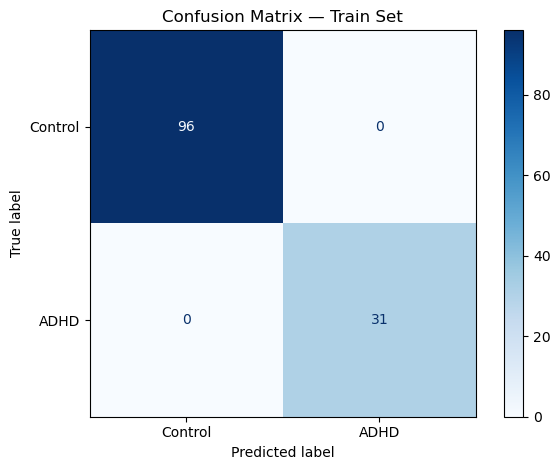

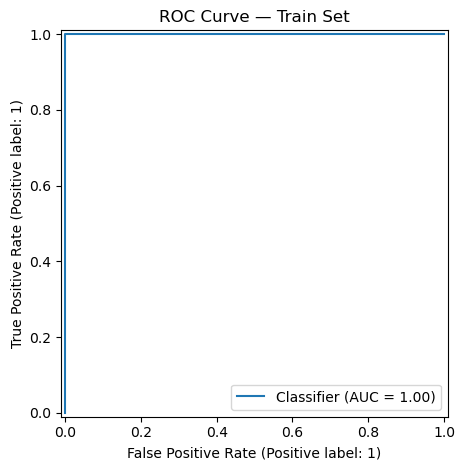

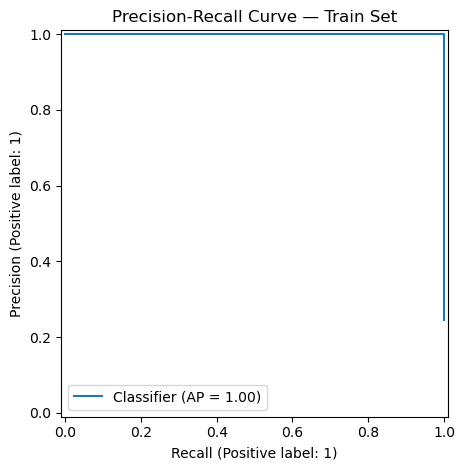

e:\anaconda\envs\basic\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\anaconda\envs\basic\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Cross-Validated Scores:
fit_time: 1.0697
score_time: 0.0931
test_accuracy: 0.7421
train_accuracy: 1.0000
test_precision_macro: 0.5560
train_precision_macro: 1.0000
test_recall_macro: 0.5542
train_recall_macro: 1.0000
test_f1_macro: 0.5348
train_f1_macro: 1.0000
test_roc_auc: 0.6576
train_roc_auc: 1.0000

📘 Classification Report (Test):
              precision    recall  f1-score   support

     Control       0.82      0.96      0.88        24
        ADHD       0.75      0.38      0.50         8

    accuracy                           0.81        32
   macro avg       0.79      0.67      0.69        32
weighted avg       0.80      0.81      0.79        32

ROC AUC (Test): 0.890625


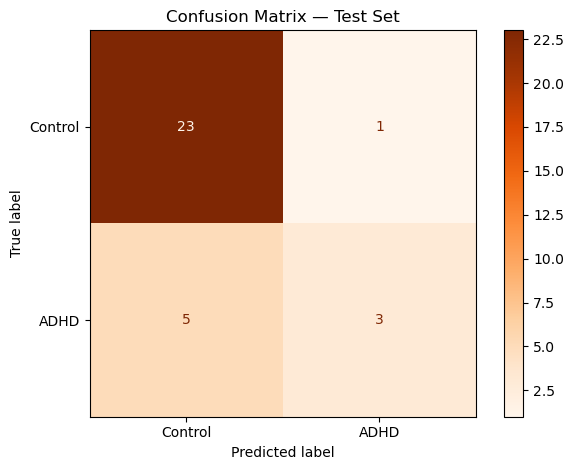

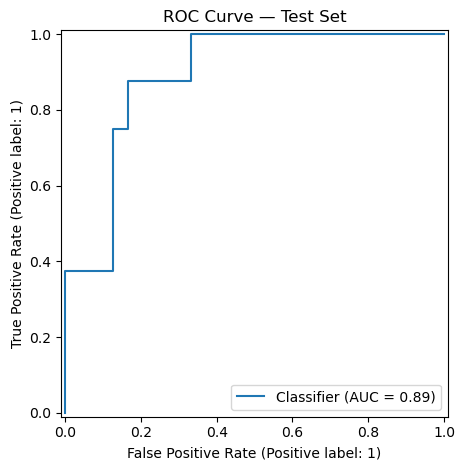

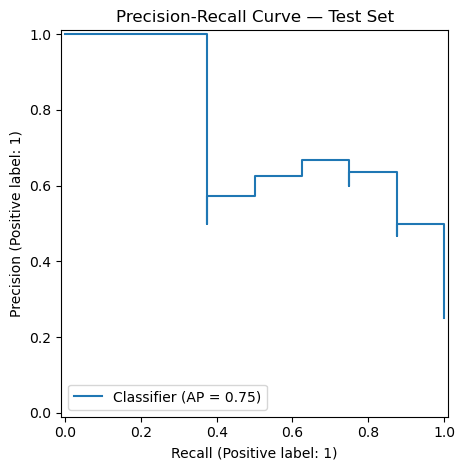

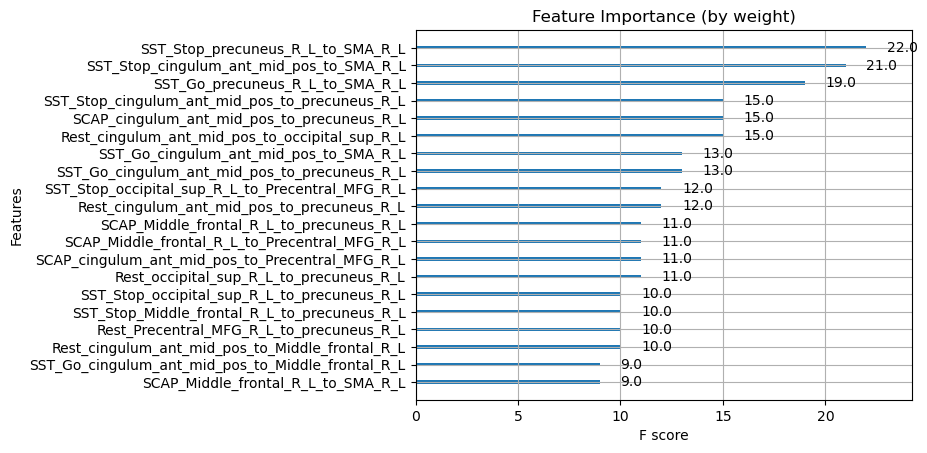

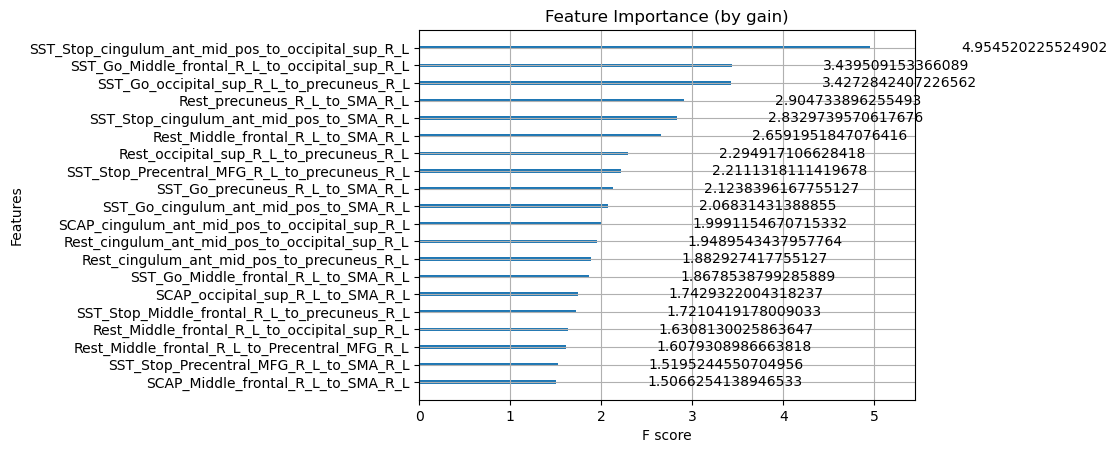

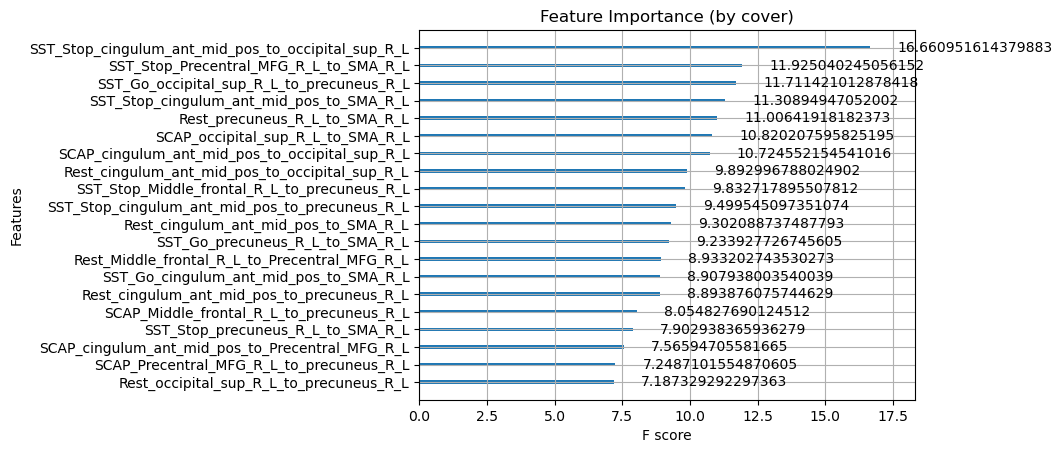

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay,
                             roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay)
import xgboost as xgb

# === STEP 1: Prepare features and labels ===
X = df_combined.drop(columns=['Subject_ID', 'Label'])
y = df_combined['Label']
subject_ids = df_combined['Subject_ID']

# === STEP 2: Train-test split (keep test untouched)
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
    X, y, subject_ids, test_size=0.2, stratify=y, random_state=42
)

# === Stratified K-Fold ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)



# === XGBoost Classifier with booster='dart' and tree_method='auto' ===
xgb_model = xgb.XGBClassifier(
    booster='dart',
    tree_method='auto',
    eval_metric='logloss',
    random_state=42
)

# === Pipeline: Raw -> RF selector -> Scaler -> XGBoost ===
pipeline = Pipeline([('xgb', xgb_model)])

# === Param Grid for XGBoost ===
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__reg_alpha': [0, 0.1, 0.3, 0.5, 0.7, 1],       # L1 regularization
    'xgb__reg_lambda': [1, 2, 5],        # L2 regularization
    'xgb__scale_pos_weight': [(len(y_train) - sum(y_train)) / sum(y_train)],
    
}


# === Grid SearchCV ===
grid_p = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring={
        'accuracy': 'accuracy',
        'precision_macro': 'precision_macro',
        'recall_macro': 'recall_macro',
        'f1_macro': 'f1_macro',
        'roc_auc': 'roc_auc'
    },
    refit='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# === Fit Model ===
grid_p.fit(X_train, y_train)
print("✅ Best Params:", grid_p.best_params_)

# === Train Predictions ===
y_train_pred = grid_p.predict(X_train)
y_train_proba = grid_p.predict_proba(X_train)[:, 1]

# === Evaluation Metrics (Train) ===
print("📘 Classification Report (Train):")
print(classification_report(y_train, y_train_pred, target_names=['Control', 'ADHD']))
print("ROC AUC (Train):", roc_auc_score(y_train, y_train_proba))

# === Confusion Matrix (Train) ===
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['Control', 'ADHD'], cmap='Blues')
plt.title("Confusion Matrix — Train Set")
plt.tight_layout()
plt.show()

# === ROC Curve (Train) ===
RocCurveDisplay.from_predictions(y_train, y_train_proba)
plt.title("ROC Curve — Train Set")
plt.tight_layout()
plt.show()

# === Precision-Recall Curve (Train) ===
PrecisionRecallDisplay.from_predictions(y_train, y_train_proba)
plt.title("Precision-Recall Curve — Train Set")
plt.tight_layout()
plt.show()

# === Cross-Validated Scores ===
cv_scores = cross_validate(
    grid_p.best_estimator_,
    X, y,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc'],
    cv=cv,
    return_train_score=True
)

print("\n📊 Cross-Validated Scores:")
for k, v in cv_scores.items():
    print(f"{k}: {np.mean(v):.4f}")

# === TEST PREDICTIONS AND EVALUATION ===
y_test_pred = grid_p.predict(X_test)
y_test_proba = grid_p.predict_proba(X_test)[:, 1]

print("\n📘 Classification Report (Test):")
print(classification_report(y_test, y_test_pred, target_names=['Control', 'ADHD']))
print("ROC AUC (Test):", roc_auc_score(y_test, y_test_proba))

# === Confusion Matrix (Test) ===
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['Control', 'ADHD'], cmap='Oranges')
plt.title("Confusion Matrix — Test Set")
plt.tight_layout()
plt.show()

# === ROC Curve (Test) ===
RocCurveDisplay.from_predictions(y_test, y_test_proba)
plt.title("ROC Curve — Test Set")
plt.tight_layout()
plt.show()

# === Precision-Recall Curve (Test) ===
PrecisionRecallDisplay.from_predictions(y_test, y_test_proba)
plt.title("Precision-Recall Curve — Test Set")
plt.tight_layout()
plt.show()


#===plotting feature importance of best model===

# Extract the best XGBoost model from the pipeline
best_xgb_model = grid_p.best_estimator_.named_steps['xgb']

# Plot feature importance (default: based on weight)
xgb.plot_importance(best_xgb_model, importance_type='weight', max_num_features=20)
plt.title("Feature Importance (by weight)")
plt.show()

# You can also plot by other importance types, e.g., 'gain' or 'cover':
xgb.plot_importance(best_xgb_model, importance_type='gain', max_num_features=20)
plt.title("Feature Importance (by gain)")
plt.show()

xgb.plot_importance(best_xgb_model, importance_type='cover', max_num_features=20)
plt.title("Feature Importance (by cover)")
plt.show()


<Figure size 2000x1000 with 0 Axes>

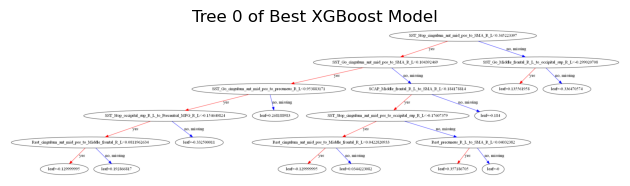

<Figure size 2000x1000 with 0 Axes>

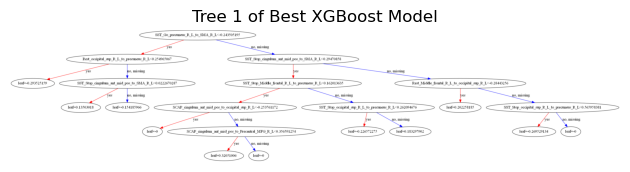

<Figure size 2000x1000 with 0 Axes>

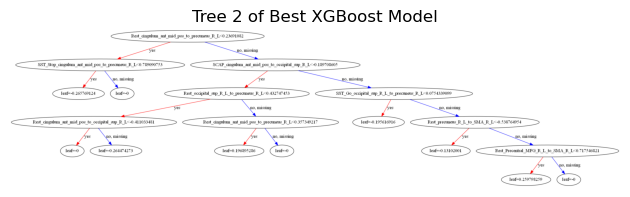

In [4]:
# === Plot Individual Trees from Best XGBoost Model ===

# Note: Each tree can be large; start by plotting the first one only.
plt.figure(figsize=(20, 10))  # Adjust size as needed
xgb.plot_tree(best_xgb_model, num_trees=0)  # Plot the first tree
plt.title("Tree 0 of Best XGBoost Model")
plt.tight_layout()
plt.show()

# Optional: Plot more trees (e.g., 1st and 2nd)
for i in range(1, 3):  # Change range as desired
    plt.figure(figsize=(20, 10))
    xgb.plot_tree(best_xgb_model, num_trees=i)
    plt.title(f"Tree {i} of Best XGBoost Model")
    plt.tight_layout()
    plt.show()


**Learning Curve**

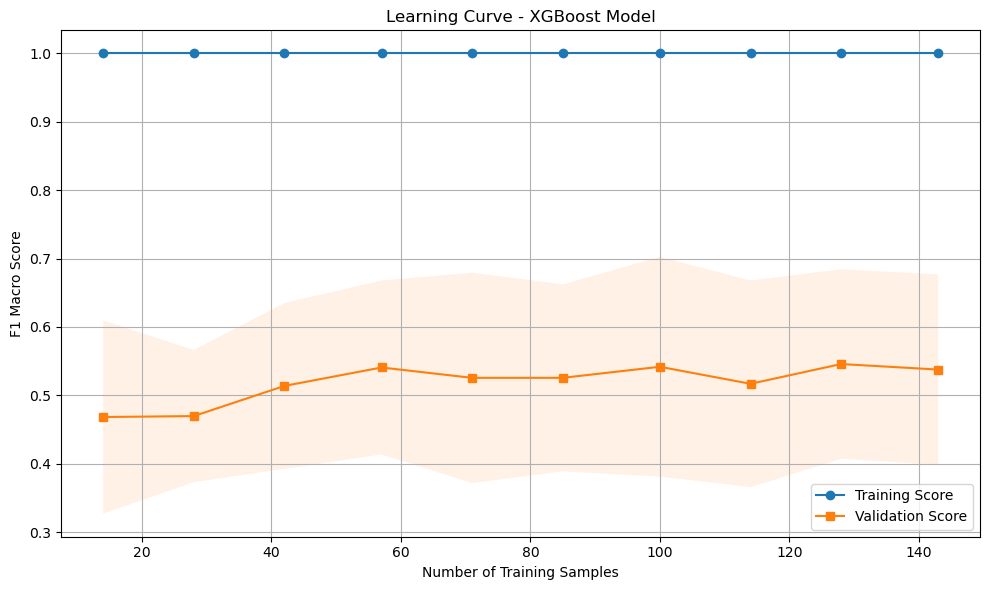

In [5]:
from sklearn.model_selection import learning_curve

# === Generate Learning Curve ===
train_sizes, train_scores, val_scores = learning_curve(
    estimator=grid_p.best_estimator_,  # your tuned XGB pipeline
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 points from 10% to 100%
    cv=cv,
    scoring='f1_macro',  # or 'accuracy', 'roc_auc', etc.
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# === Compute Means and STDs ===
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# === Plot Learning Curve ===
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, val_mean, label='Validation Score', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

plt.title('Learning Curve - XGBoost Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Macro Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


**SHAP Interpretation of Top 20 Features**

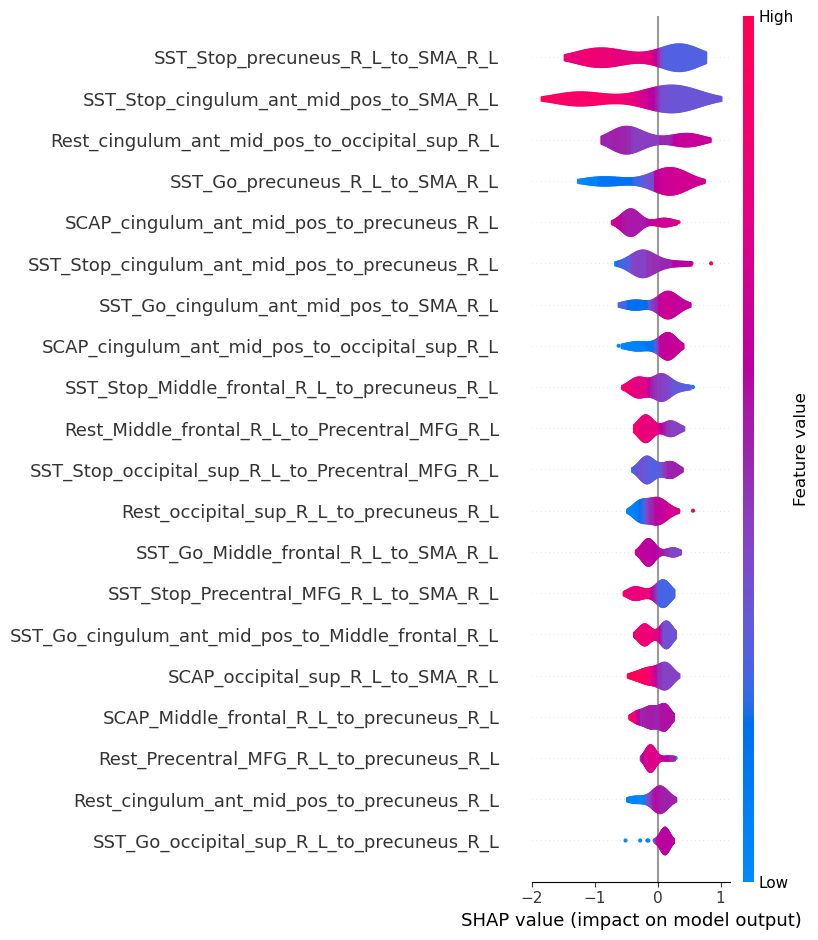

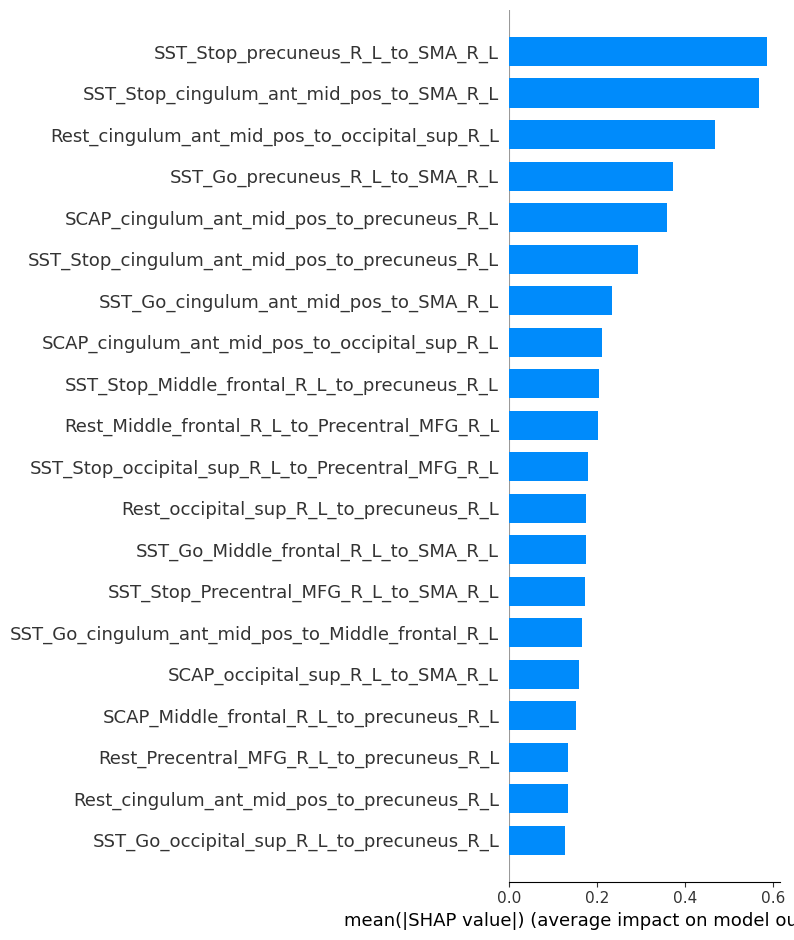


🔍 SHAP Dependence Plot for: SST_Stop_precuneus_R_L_to_SMA_R_L


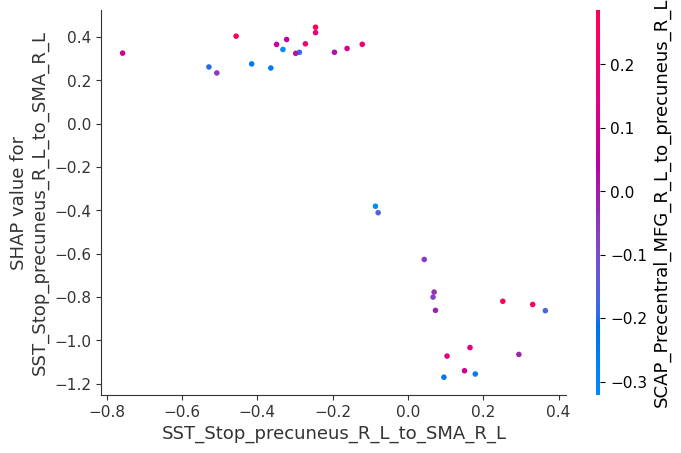


🔍 SHAP Dependence Plot for: SST_Stop_cingulum_ant_mid_pos_to_SMA_R_L


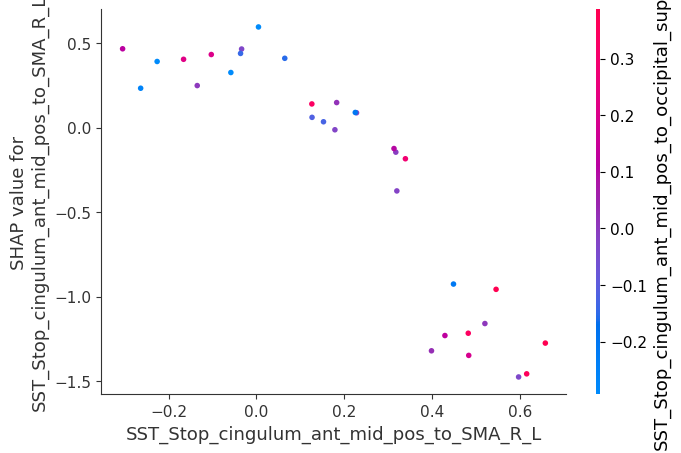


🔍 SHAP Dependence Plot for: Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L


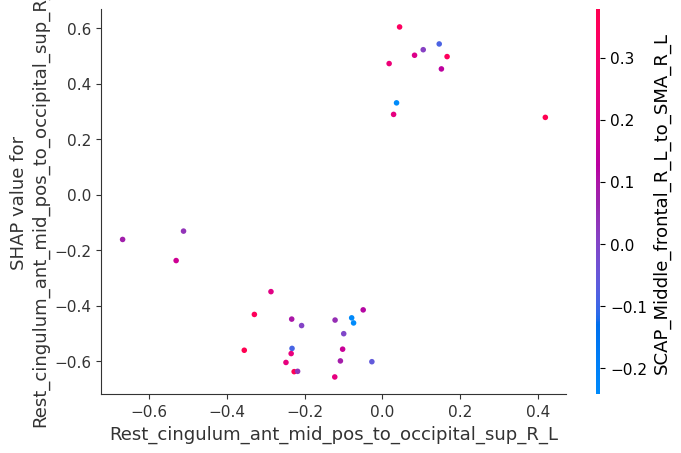


🔍 SHAP Dependence Plot for: SST_Go_precuneus_R_L_to_SMA_R_L


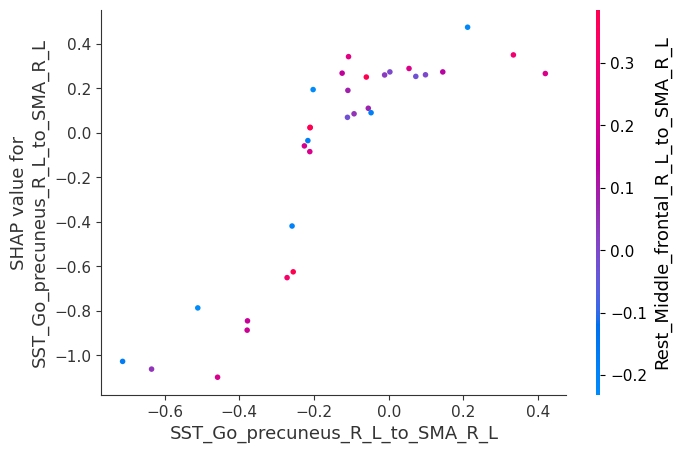


🔍 SHAP Dependence Plot for: SCAP_cingulum_ant_mid_pos_to_precuneus_R_L


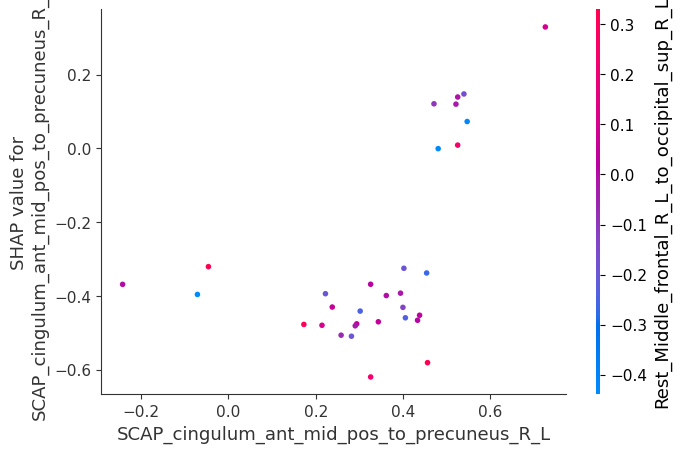


🔍 SHAP Dependence Plot for: SST_Stop_cingulum_ant_mid_pos_to_precuneus_R_L


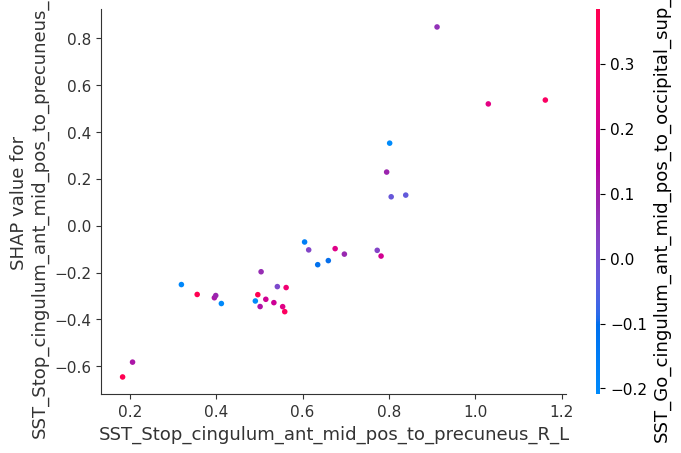


🔍 SHAP Dependence Plot for: SST_Go_cingulum_ant_mid_pos_to_SMA_R_L


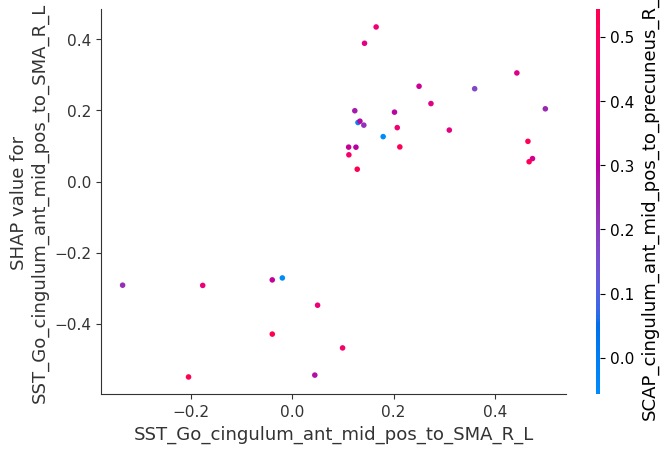


🔍 SHAP Dependence Plot for: SCAP_cingulum_ant_mid_pos_to_occipital_sup_R_L


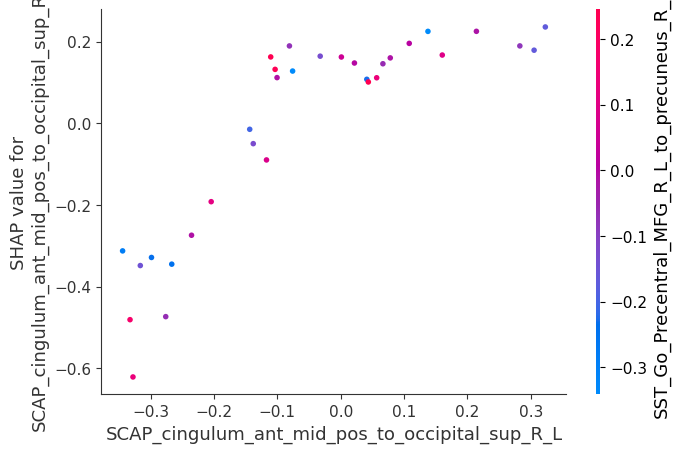


🔍 SHAP Dependence Plot for: SST_Stop_Middle_frontal_R_L_to_precuneus_R_L


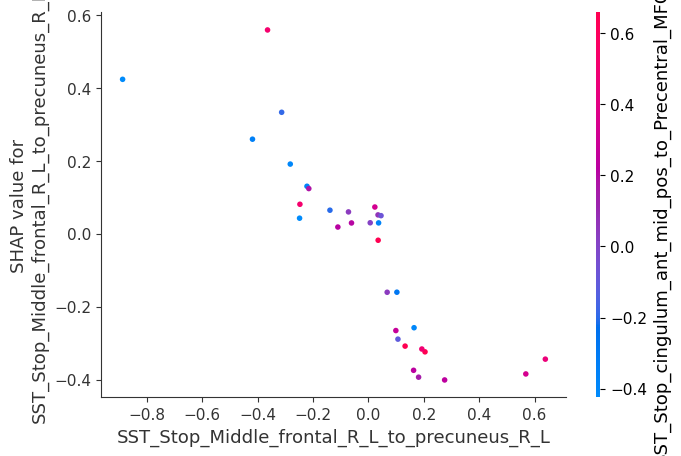


🔍 SHAP Dependence Plot for: Rest_Middle_frontal_R_L_to_Precentral_MFG_R_L


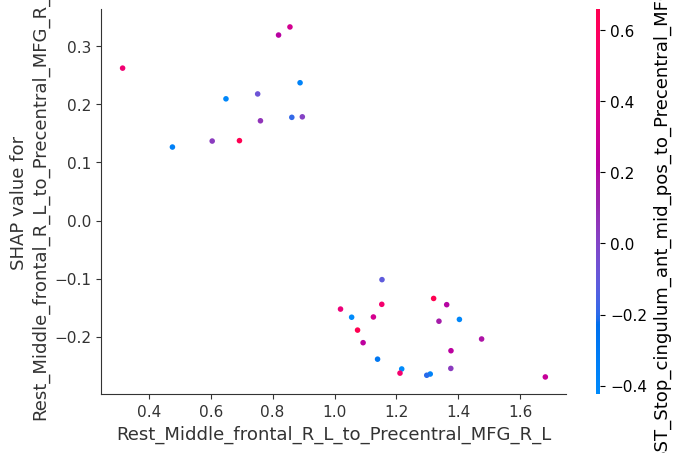

In [9]:
import shap



# === Extract trained XGBoost model ===
best_xgb_model = grid_p.best_estimator_.named_steps['xgb']

# === SHAP EXPLAINER (TreeExplainer is optimized for XGBoost) ===
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)  # SHAP values for test set

# === SHAP SUMMARY PLOT (BEESWARM) ===
shap.summary_plot(shap_values, X_test, plot_type="violin", max_display=20)

# === SHAP SUMMARY PLOT (BAR PLOT OF MEAN ABSOLUTE VALUES) ===
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

# === SHAP DEPENDENCE PLOTS FOR TOP FEATURES ===
# Identify top features by mean(|SHAP|) value
shap_abs_mean = np.abs(shap_values).mean(axis=0)
top_indices = np.argsort(shap_abs_mean)[-10:][::-1]
top_features = X_test.columns[top_indices]

# Dependence plots for top 3 features
for feat in top_features:
    print(f"\n🔍 SHAP Dependence Plot for: {feat}")
    shap.dependence_plot(feat, shap_values, X_test)



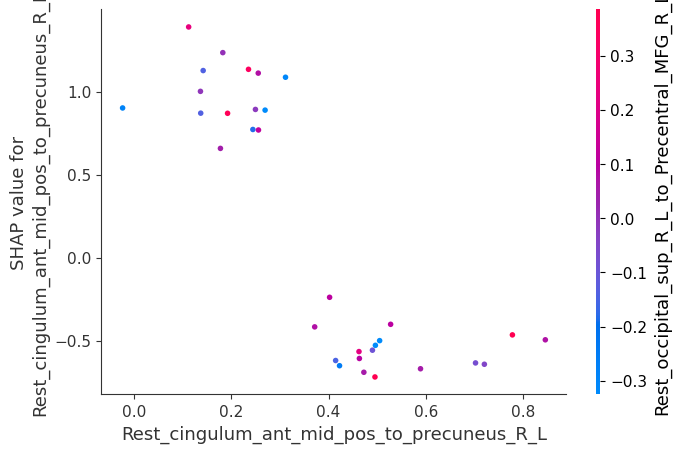

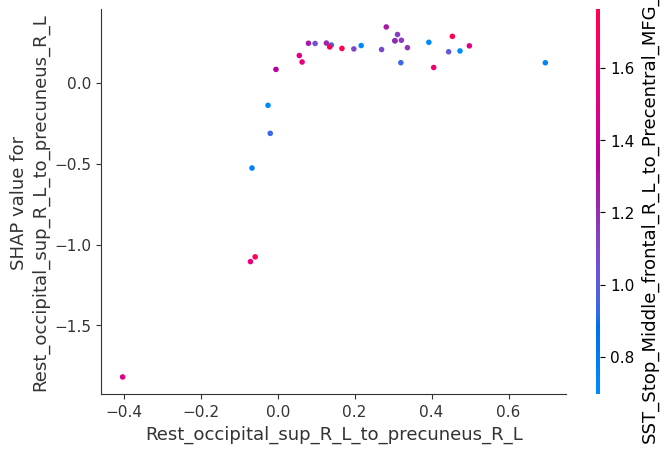

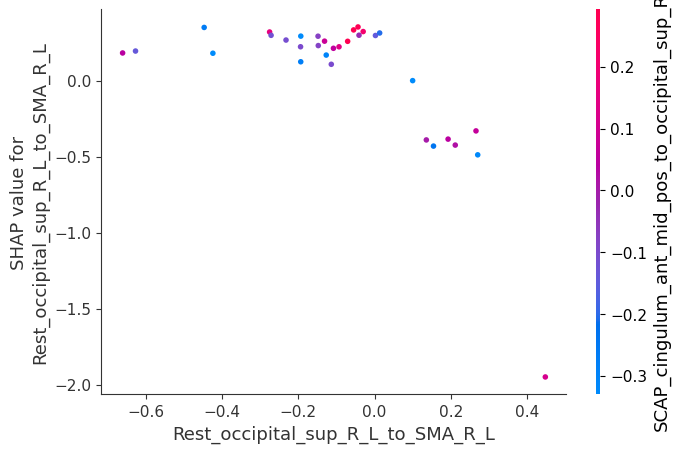

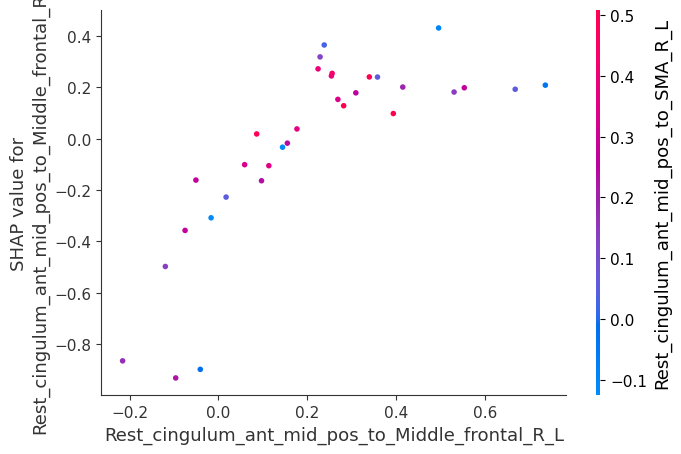

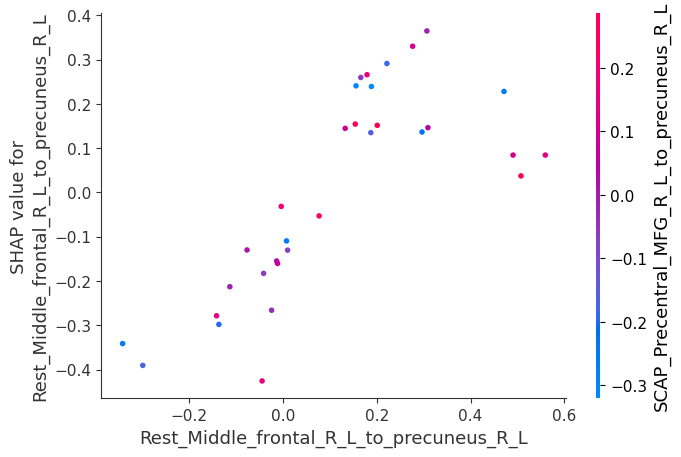

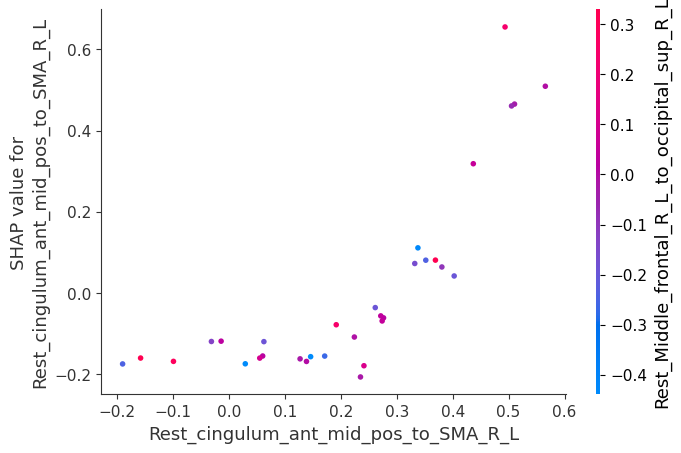

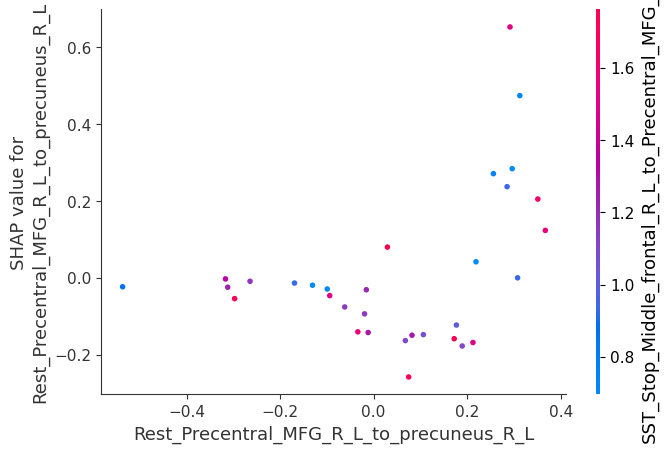

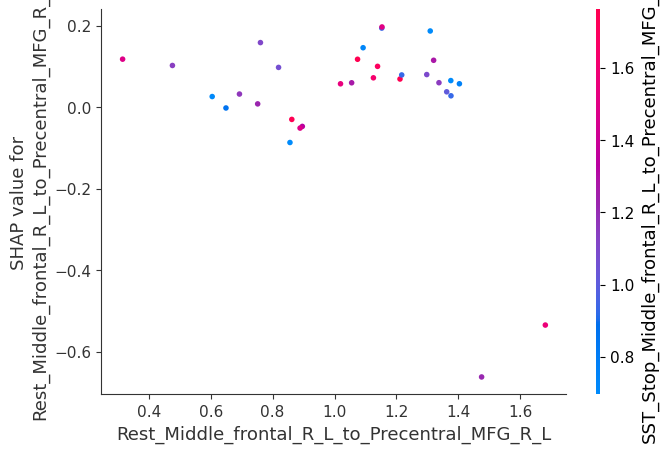

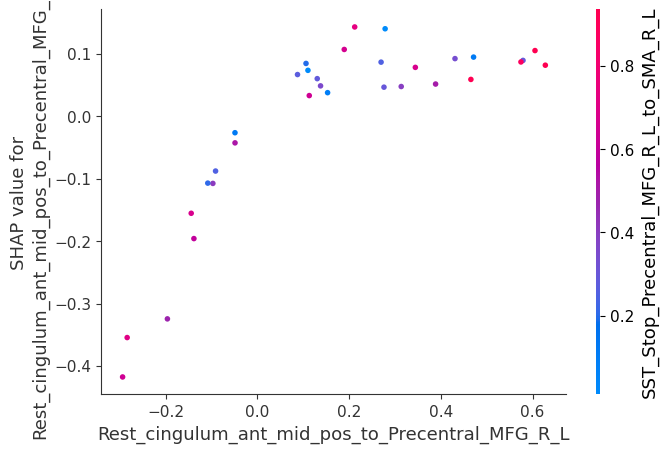

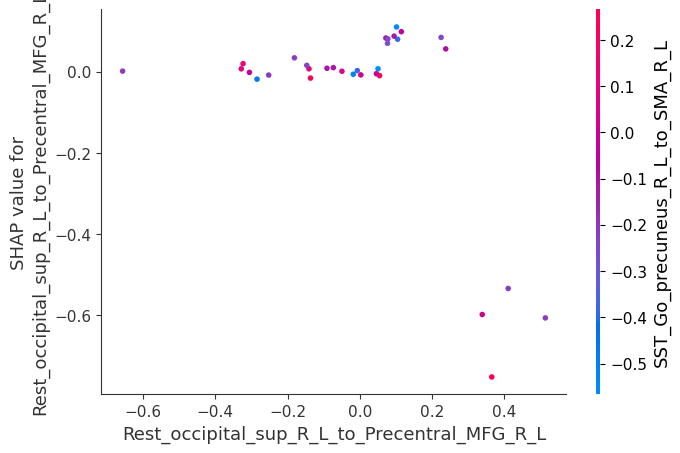

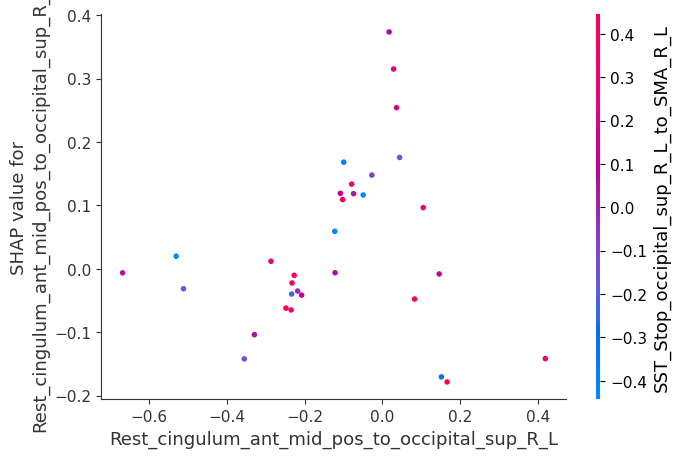

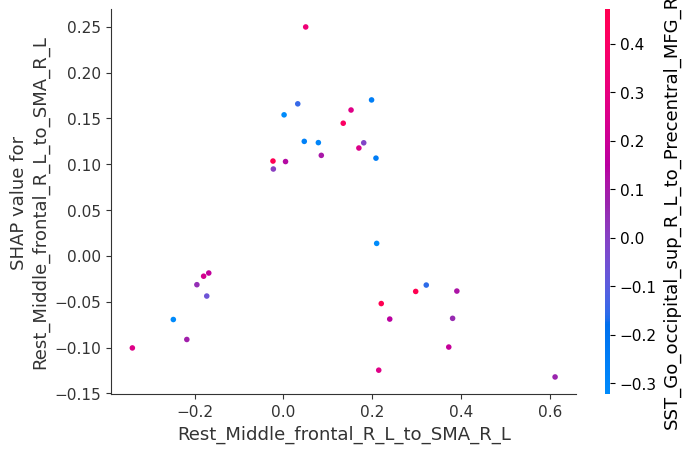

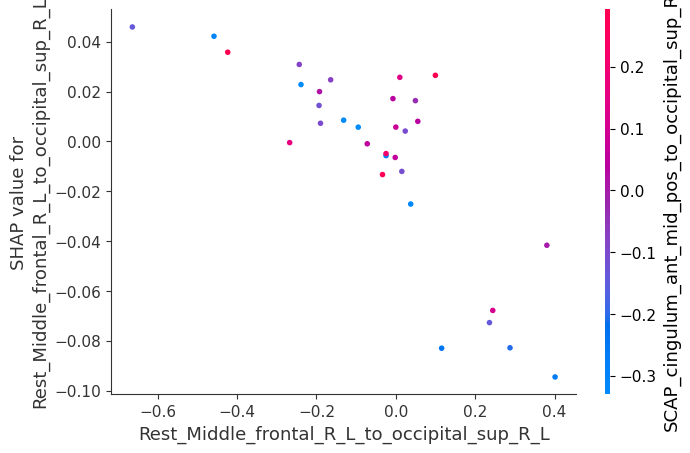

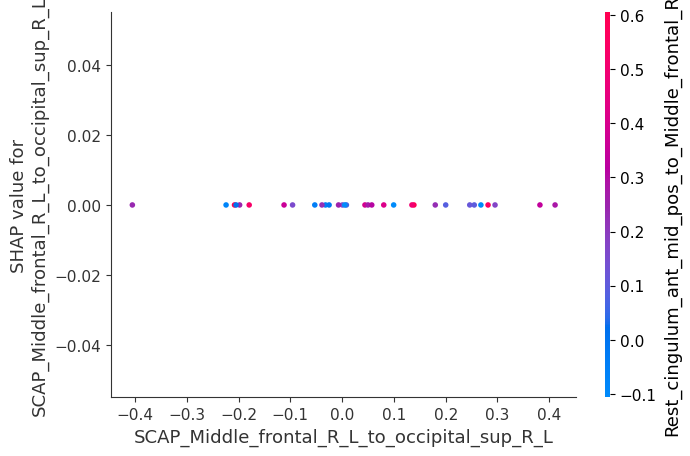

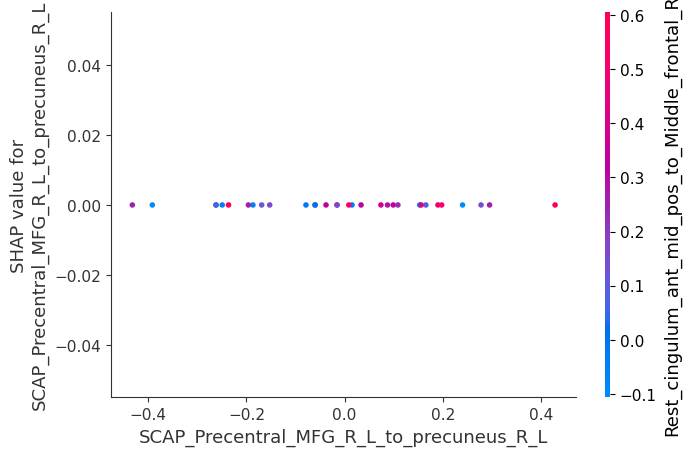

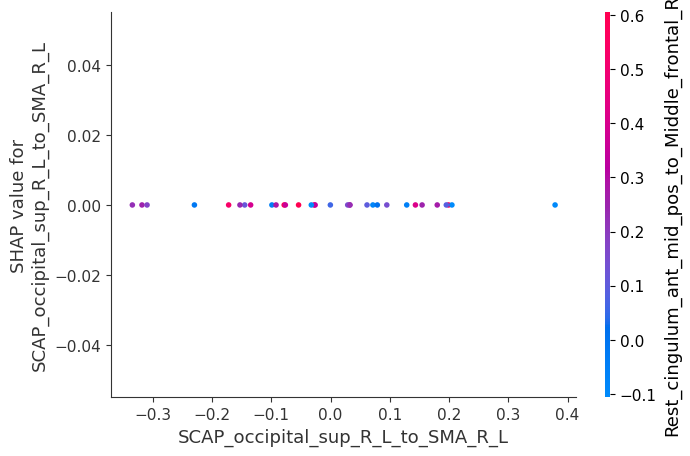

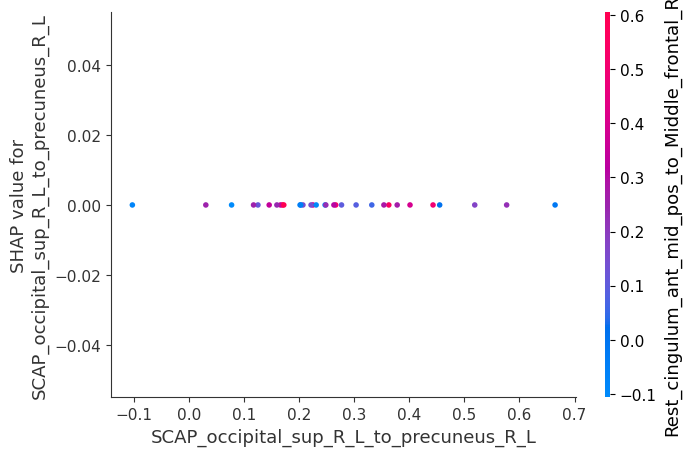

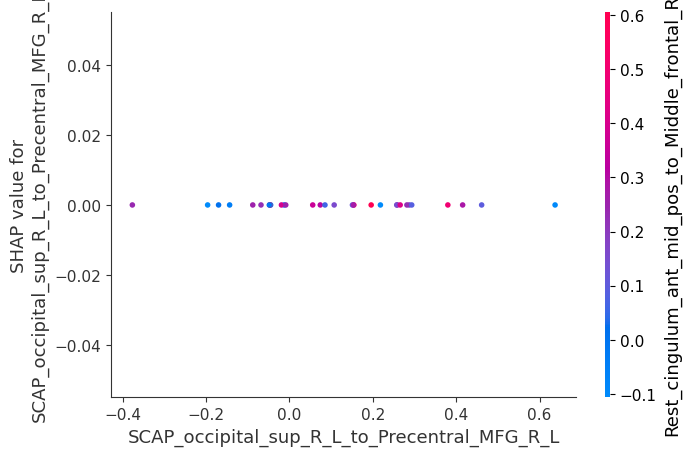

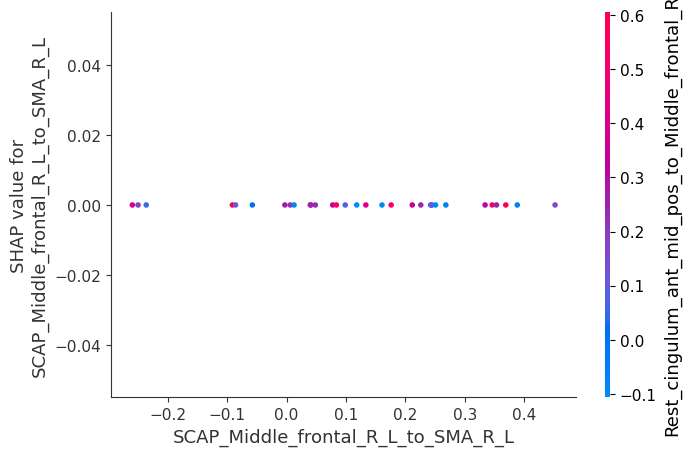

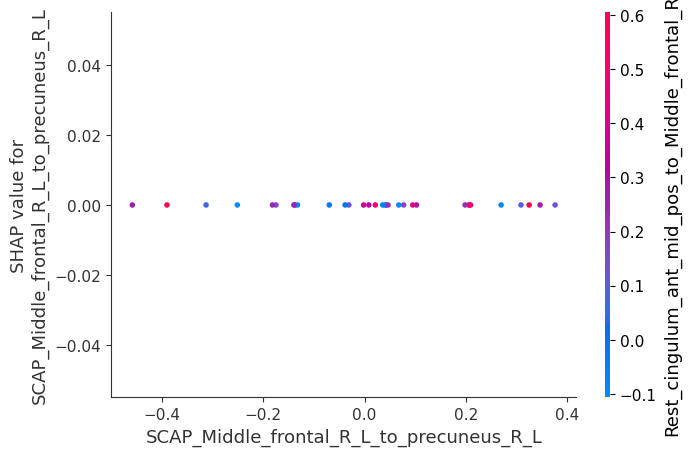

In [8]:
# Plot with automatic interaction detection
for i in top_20_indices:
    shap.dependence_plot(i, shap_values.values, X_test, feature_names=feature_names)


# With RFECV(XGBoost)

Fitting estimator with 60 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:33] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 59 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:34] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 58 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:35] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 57 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:35] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 56 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 55 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:37] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 54 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:38] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 53 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:39] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 52 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:40] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 51 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 50 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 49 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 48 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 47 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:45] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 46 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:46] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 45 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:47] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 44 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 43 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 42 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:49] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 41 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:50] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 40 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 39 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 38 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:52] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 37 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:53] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 36 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 35 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting estimator with 34 features.


e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:55] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:56] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:57] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Selected Features by RFECV (33):
['Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L', 'Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L', 'Rest_Middle_frontal_R_L_to_occipital_sup_R_L', 'Rest_Middle_frontal_R_L_to_Precentral_MFG_R_L', 'Rest_Middle_frontal_R_L_to_precuneus_R_L', 'Rest_Middle_frontal_R_L_to_SMA_R_L', 'Rest_occipital_sup_R_L_to_precuneus_R_L', 'Rest_occipital_sup_R_L_to_SMA_R_L', 'Rest_Precentral_MFG_R_L_to_precuneus_R_L', 'SCAP_cingulum_ant_mid_pos_to_occipital_sup_R_L', 'SCAP_cingulum_ant_mid_pos_to_Precentral_MFG_R_L', 'SCAP_cingulum_ant_mid_pos_to_precuneus_R_L', 'SCAP_cingulum_ant_mid_pos_to_SMA_R_L', 'SCAP_Middle_frontal_R_L_to_Precentral_MFG_R_L', 'SCAP_Middle_frontal_R_L_to_SMA_R_L', 'SCAP_occipital_sup_R_L_to_Precentral_MFG_R_L', 'SCAP_Precentral_MFG_R_L_to_precuneus_R_L', 'SST_Go_cingulum_ant_mid_pos_to_occipital_sup_R_L', 'SST_Go_cingulum_ant_mid_pos_to_Precentral_MFG_R_L', 'SST_Go_Middle_frontal_R_L_to_Precentral_MFG_R_L', 'SST_Go_Middle_frontal_R_L_to_SMA_R_L

e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:31] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Params: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 4, 'xgb__n_estimators': 50, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 5, 'xgb__scale_pos_weight': 3.096774193548387, 'xgb__subsample': 1.0}

📘 Classification Report (Train):
              precision    recall  f1-score   support

     Control       1.00      1.00      1.00        96
        ADHD       1.00      1.00      1.00        31

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127

ROC AUC (Train): 1.0


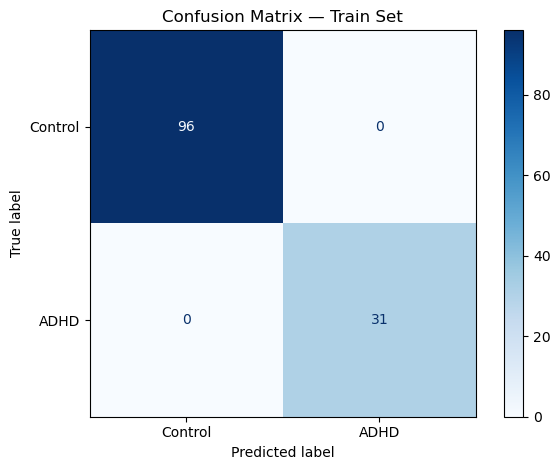

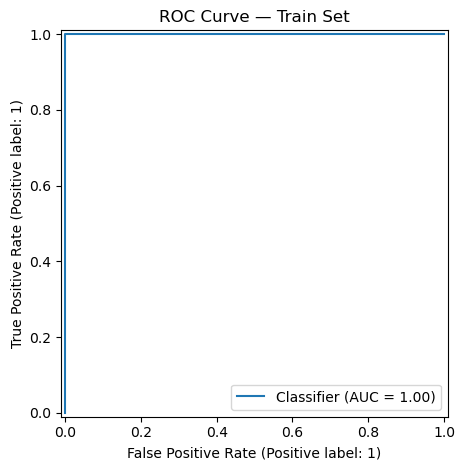

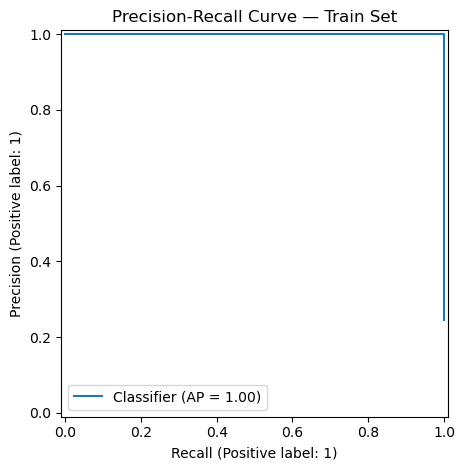

e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:33] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:33] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:34] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\anaconda\envs\basic\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:34] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\anaconda\envs\basic\Lib\site-


📊 Cross-Validated Scores:
fit_time: 0.3056
score_time: 0.0663
test_accuracy: 0.7742
train_accuracy: 1.0000
test_precision_macro: 0.6559
train_precision_macro: 1.0000
test_recall_macro: 0.6250
train_recall_macro: 1.0000
test_f1_macro: 0.6237
train_f1_macro: 1.0000
test_roc_auc: 0.7444
train_roc_auc: 1.0000

📘 Classification Report (Test):
              precision    recall  f1-score   support

     Control       0.76      0.92      0.83        24
        ADHD       0.33      0.12      0.18         8

    accuracy                           0.72        32
   macro avg       0.55      0.52      0.51        32
weighted avg       0.65      0.72      0.67        32

ROC AUC (Test): 0.84375


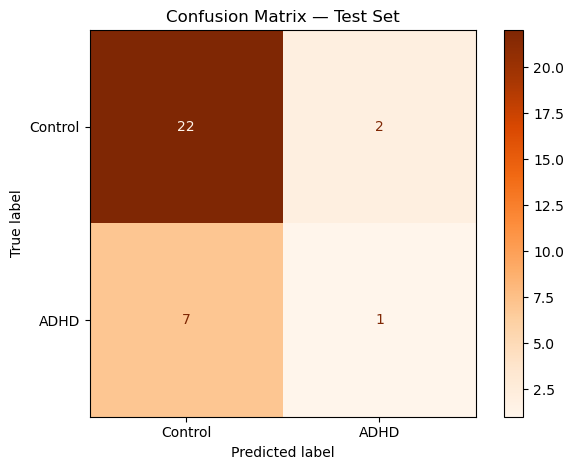

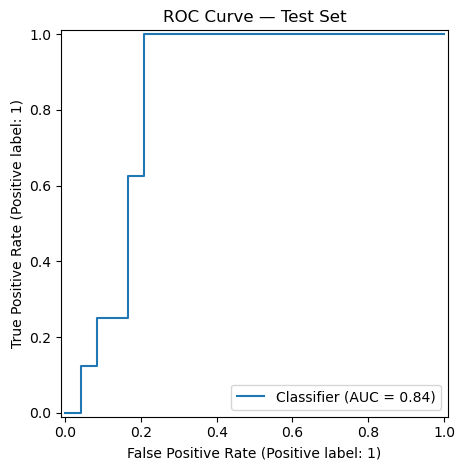

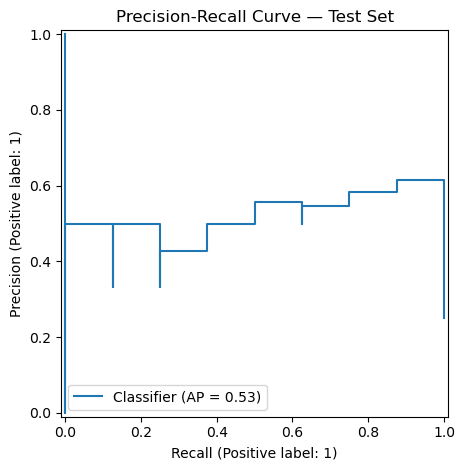

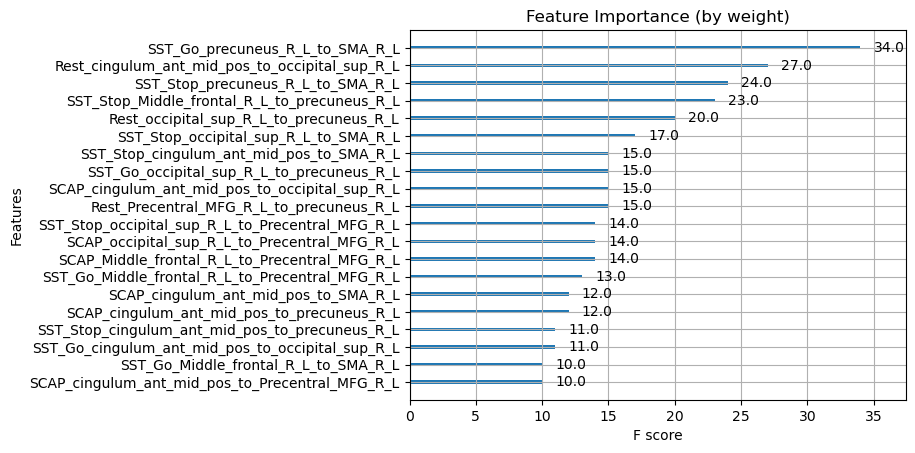

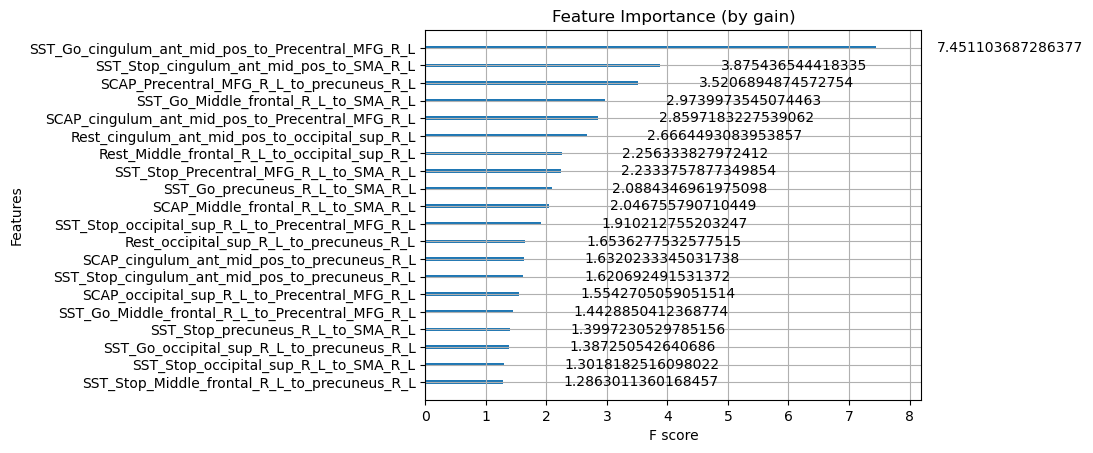

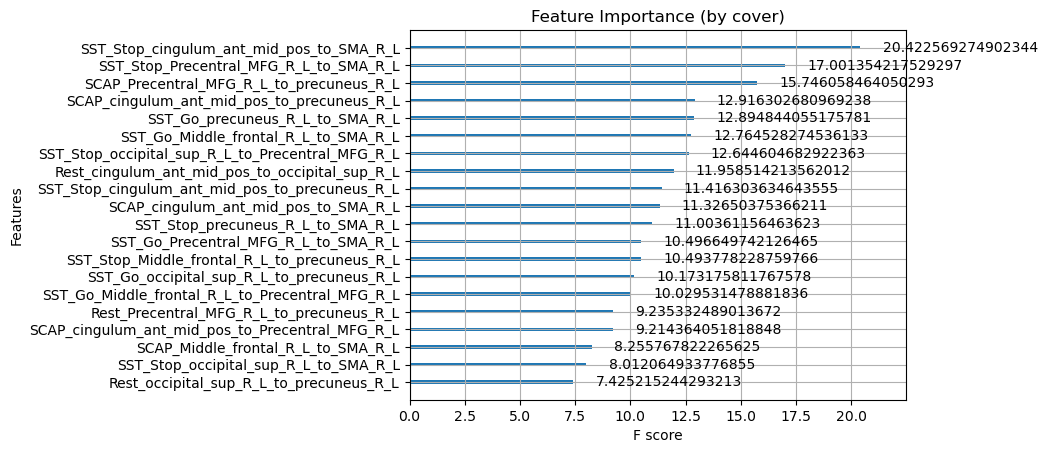

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay,
                             roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.feature_selection import RFECV

# === STEP 1: Prepare features and labels ===
X = df_combined.drop(columns=['Subject_ID', 'Label'])
y = df_combined['Label']
subject_ids = df_combined['Subject_ID']

# === STEP 2: Train-test split ===
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
    X, y, subject_ids, test_size=0.2, stratify=y, random_state=42
)

# === STEP 3: Feature Selection using RFECV ===
rfecv_selector = RFECV(
    estimator=xgb.XGBClassifier(
        booster='dart',
        tree_method='auto',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ),
    step=1,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rfecv_selector.fit(X_train, y_train)

# === STEP 4: Apply selected features ===
selected_features = X_train.columns[rfecv_selector.support_]
print(f"\n✅ Selected Features by RFECV ({len(selected_features)}):\n{selected_features.tolist()}")

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]
X_sel = X[selected_features]

# === STEP 5: XGBoost Classifier ===
xgb_model = xgb.XGBClassifier(
    booster='dart',
    tree_method='auto',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

pipeline = Pipeline([('xgb', xgb_model)])

param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__reg_alpha': [0, 0.1, 0.3, 0.5, 0.7, 1],
    'xgb__reg_lambda': [1, 2, 5],
    'xgb__scale_pos_weight': [(len(y_train) - sum(y_train)) / sum(y_train)],
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_p = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring={
        'accuracy': 'accuracy',
        'precision_macro': 'precision_macro',
        'recall_macro': 'recall_macro',
        'f1_macro': 'f1_macro',
        'roc_auc': 'roc_auc'
    },
    refit='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# === Fit the pipeline on selected features ===
grid_p.fit(X_train_sel, y_train)
print("✅ Best Params:", grid_p.best_params_)

# === Train Evaluation ===
y_train_pred = grid_p.predict(X_train_sel)
y_train_proba = grid_p.predict_proba(X_train_sel)[:, 1]

print("\n📘 Classification Report (Train):")
print(classification_report(y_train, y_train_pred, target_names=['Control', 'ADHD']))
print("ROC AUC (Train):", roc_auc_score(y_train, y_train_proba))

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['Control', 'ADHD'], cmap='Blues')
plt.title("Confusion Matrix — Train Set")
plt.tight_layout()
plt.show()

RocCurveDisplay.from_predictions(y_train, y_train_proba)
plt.title("ROC Curve — Train Set")
plt.tight_layout()
plt.show()

PrecisionRecallDisplay.from_predictions(y_train, y_train_proba)
plt.title("Precision-Recall Curve — Train Set")
plt.tight_layout()
plt.show()

# === Cross-Validated Scores on All Data ===
cv_scores = cross_validate(
    grid_p.best_estimator_,
    X_sel, y,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc'],
    cv=cv,
    return_train_score=True
)

print("\n📊 Cross-Validated Scores:")
for k, v in cv_scores.items():
    print(f"{k}: {np.mean(v):.4f}")

# === Test Evaluation ===
y_test_pred = grid_p.predict(X_test_sel)
y_test_proba = grid_p.predict_proba(X_test_sel)[:, 1]

print("\n📘 Classification Report (Test):")
print(classification_report(y_test, y_test_pred, target_names=['Control', 'ADHD']))
print("ROC AUC (Test):", roc_auc_score(y_test, y_test_proba))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['Control', 'ADHD'], cmap='Oranges')
plt.title("Confusion Matrix — Test Set")
plt.tight_layout()
plt.show()

RocCurveDisplay.from_predictions(y_test, y_test_proba)
plt.title("ROC Curve — Test Set")
plt.tight_layout()
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_test_proba)
plt.title("Precision-Recall Curve — Test Set")
plt.tight_layout()
plt.show()

# === Feature Importance Plots ===
best_xgb_model = grid_p.best_estimator_.named_steps['xgb']

xgb.plot_importance(best_xgb_model, importance_type='weight', max_num_features=20)
plt.title("Feature Importance (by weight)")
plt.show()

xgb.plot_importance(best_xgb_model, importance_type='gain', max_num_features=20)
plt.title("Feature Importance (by gain)")
plt.show()

xgb.plot_importance(best_xgb_model, importance_type='cover', max_num_features=20)
plt.title("Feature Importance (by cover)")
plt.show()
